# House Prices Prediction 

By: M V Nikhitha

## Import the libraries


In [1]:
import json
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

pd.pandas.set_option("display.max_columns", None)

## Load the dataset


In [2]:
train_df = pd.read_csv("data/train.csv")
print(f"Number of Rows: {train_df.shape[0]}\nNumber of Columns: {train_df.shape[1]}")

Number of Rows: 1460
Number of Columns: 81


In [3]:
test_df = pd.read_csv("data/test.csv")
print(f"Number of Rows: {test_df.shape[0]}\nNumber of Columns: {test_df.shape[1]}")

Number of Rows: 1459
Number of Columns: 80


In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Missing Values


In [5]:
null_features = [col for col in train_df.columns if train_df[col].isnull().any()]
for feature in null_features:
    missing_percentage = train_df[feature].isnull().mean() * 100
    print(f"Percentage of missing values for {feature}: {missing_percentage}%")


Percentage of missing values for LotFrontage: 17.73972602739726%
Percentage of missing values for Alley: 93.76712328767123%
Percentage of missing values for MasVnrType: 59.726027397260275%
Percentage of missing values for MasVnrArea: 0.547945205479452%
Percentage of missing values for BsmtQual: 2.5342465753424657%
Percentage of missing values for BsmtCond: 2.5342465753424657%
Percentage of missing values for BsmtExposure: 2.6027397260273974%
Percentage of missing values for BsmtFinType1: 2.5342465753424657%
Percentage of missing values for BsmtFinType2: 2.6027397260273974%
Percentage of missing values for Electrical: 0.0684931506849315%
Percentage of missing values for FireplaceQu: 47.26027397260274%
Percentage of missing values for GarageType: 5.5479452054794525%
Percentage of missing values for GarageYrBlt: 5.5479452054794525%
Percentage of missing values for GarageFinish: 5.5479452054794525%
Percentage of missing values for GarageQual: 5.5479452054794525%
Percentage of missing value

#### Relationship between missing values and Sale Price

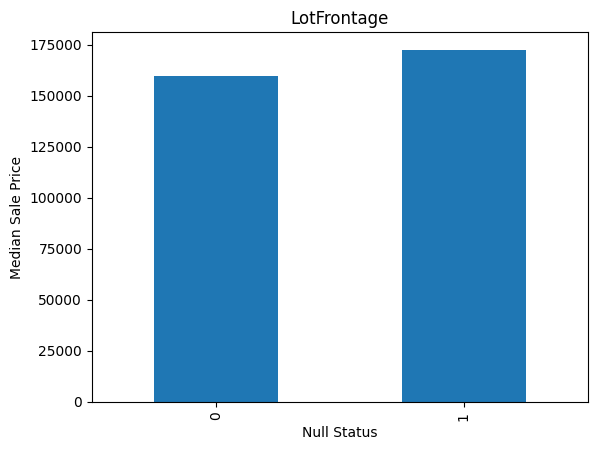

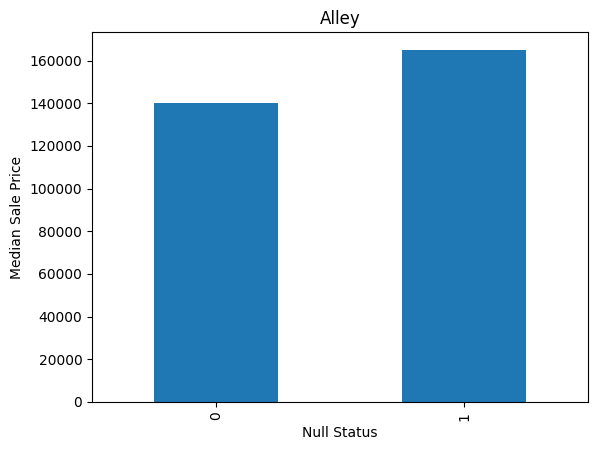

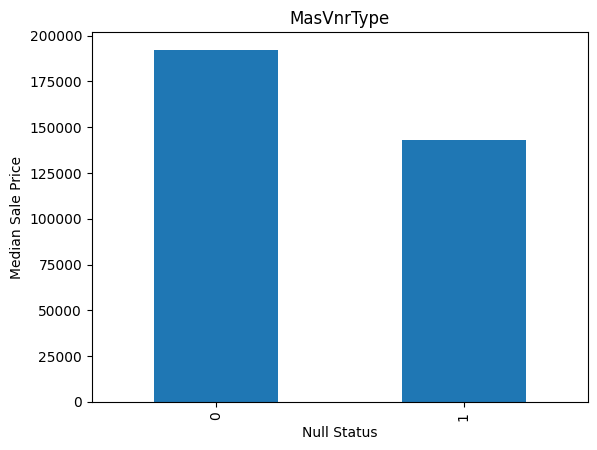

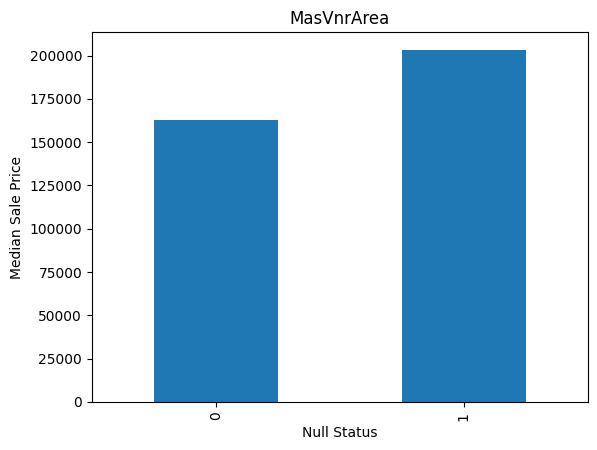

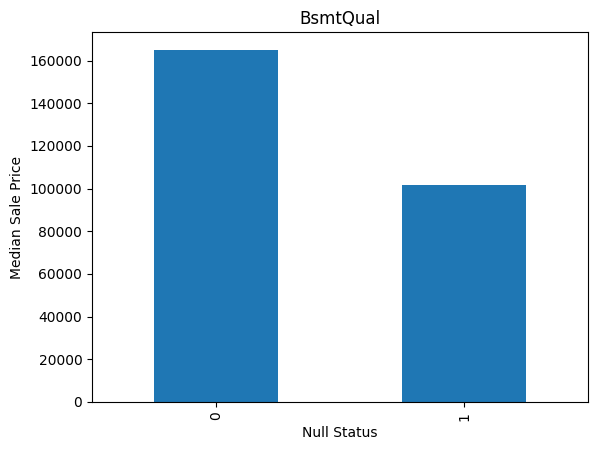

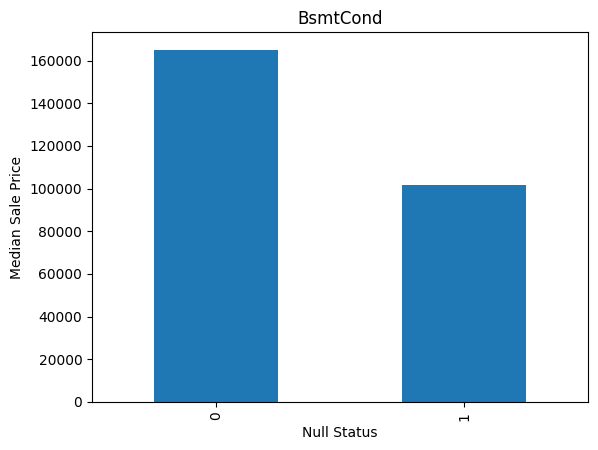

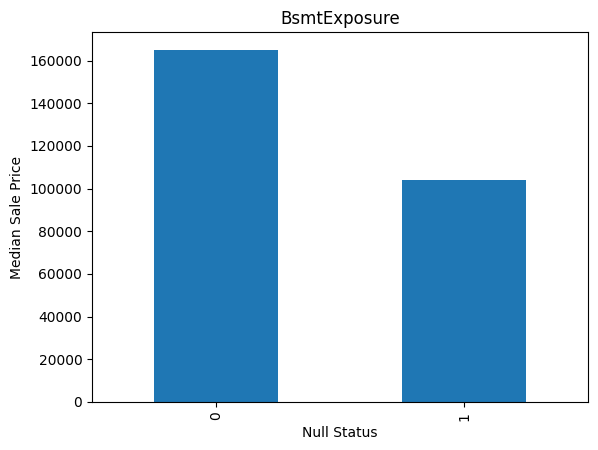

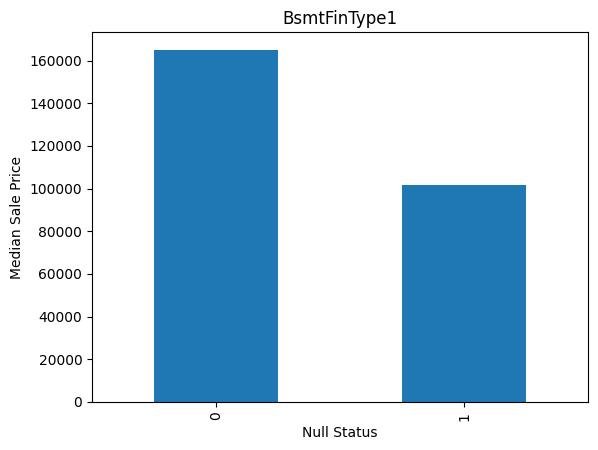

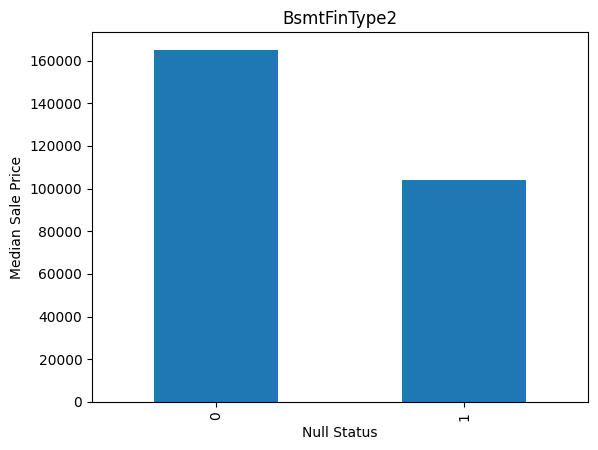

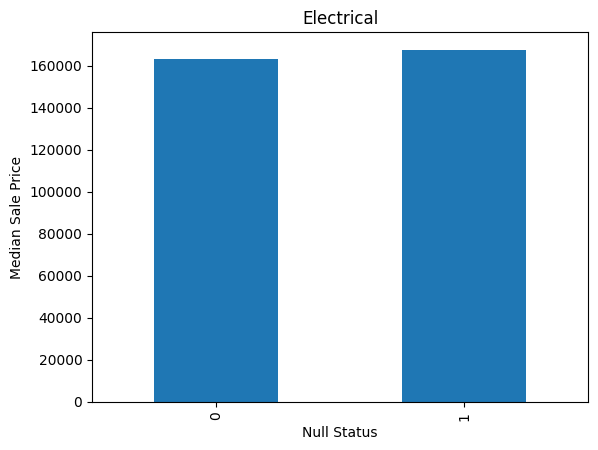

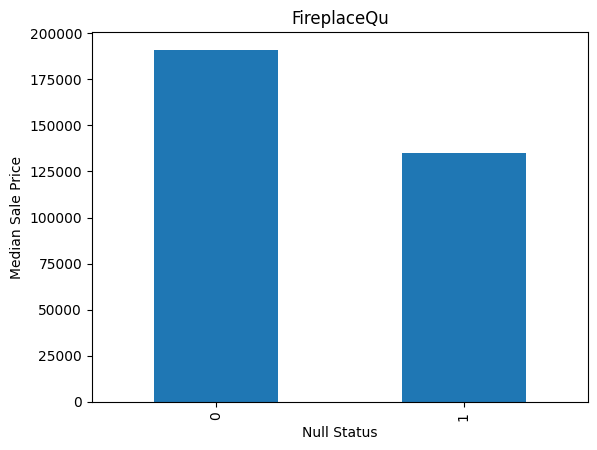

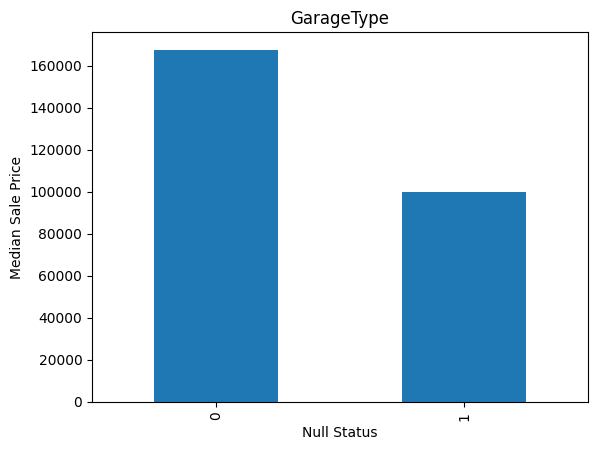

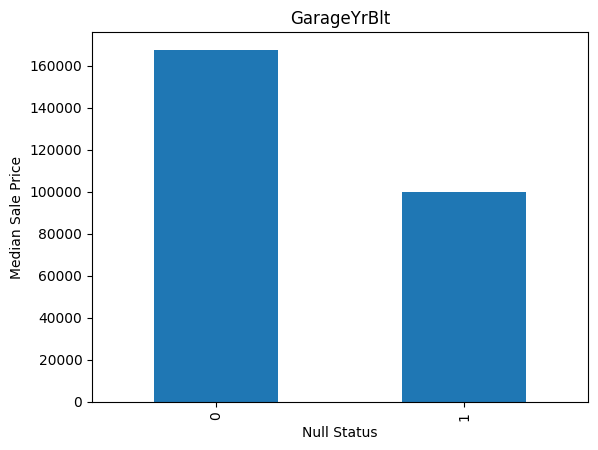

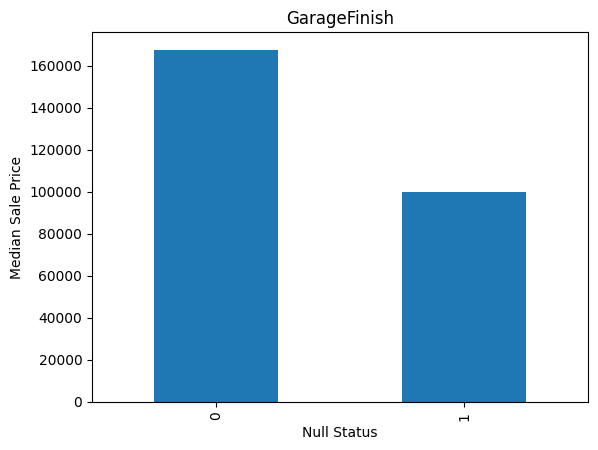

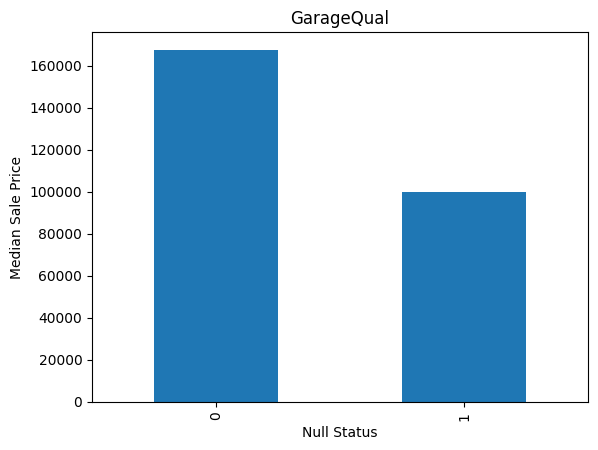

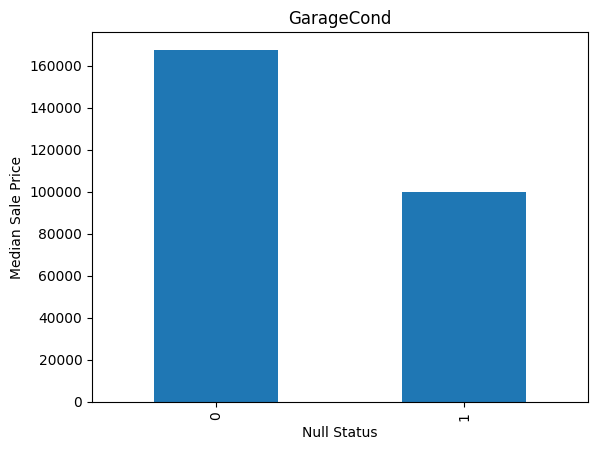

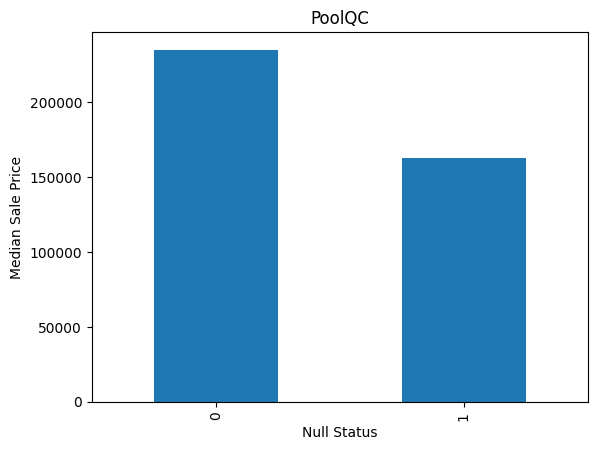

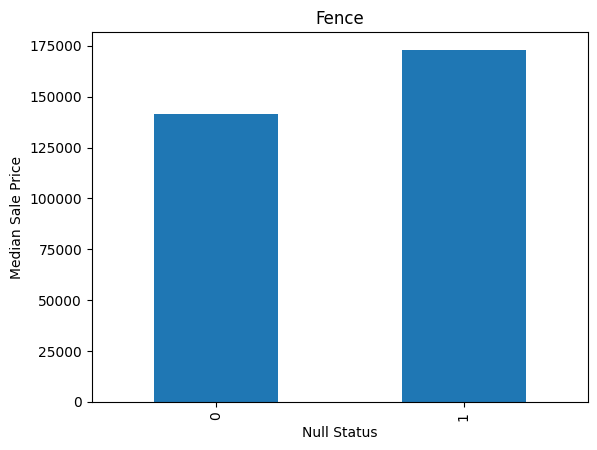

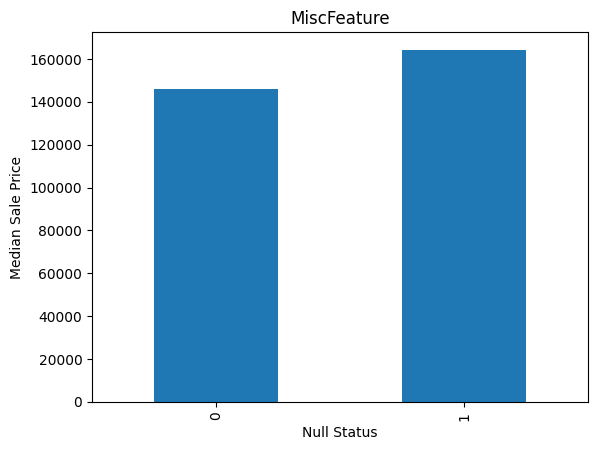

In [6]:
for feature in null_features:
    df_copy = train_df.copy()
    df_copy[feature] = np.where(df_copy[feature].isnull(), 1, 0)
    df_copy.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.xlabel("Null Status")
    plt.ylabel("Median Sale Price")
    plt.show()

### Numerical Variables / Features


In [7]:
numerical_features = [col for col in train_df.columns if train_df[col].dtypes in [np.int64, np.float64]]
print(f"Number of numerical variables/features: {len(numerical_features)}")

Number of numerical variables/features: 38


In [8]:
train_df[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal Variables / Features


In [9]:
temporal_features = [feature for feature in numerical_features if any(keyword in feature.lower() for keyword in ["yr", "year"])]
print(f"Number of temporal variables/features: {len(temporal_features)}")

Number of temporal variables/features: 4


In [10]:
train_df[temporal_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


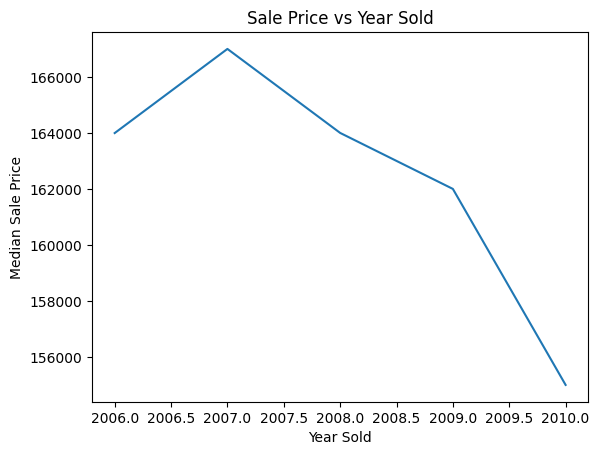

In [11]:
train_df.groupby("YrSold")["SalePrice"].median().plot()
plt.title("Sale Price vs Year Sold")
plt.xlabel("Year Sold")
plt.ylabel("Median Sale Price")
plt.show()

#### Relationship of the difference between Year Sold and temporal features with Sale Price


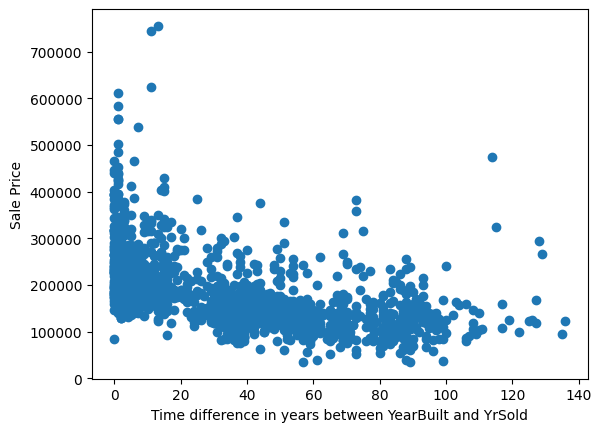

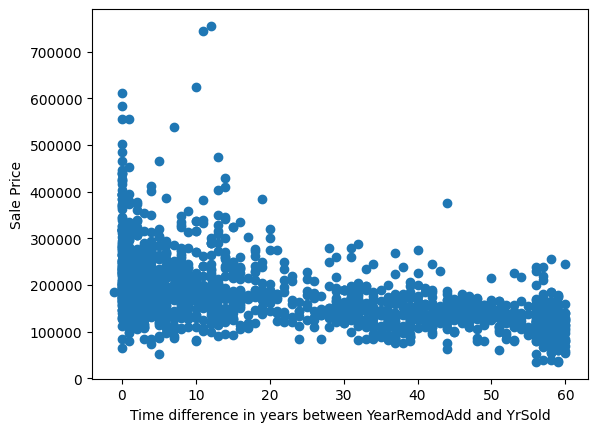

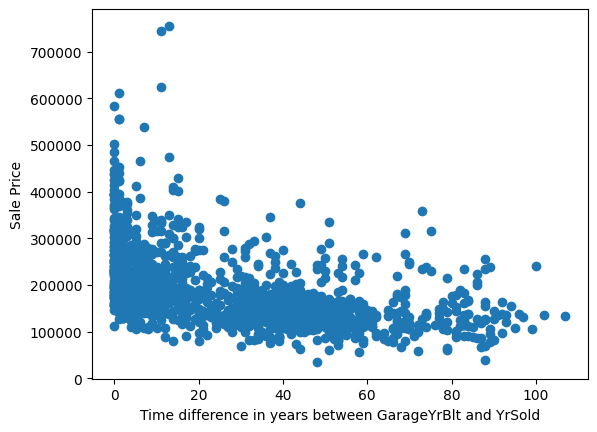

In [12]:
for feature in temporal_features:
    if feature != "YrSold":
        df_copy = train_df.copy()
        df_copy[feature] = df_copy["YrSold"] - df_copy[feature]
        plt.scatter(df_copy[feature], df_copy["SalePrice"])
        plt.xlabel(f"Time difference in years between {feature} and YrSold")
        plt.ylabel("Sale Price")
        plt.show()

### Discrete Variables / Features


In [13]:
discrete_features = [feature for feature in numerical_features if len(train_df[feature].unique()) < 25 and feature not in temporal_features + ["Id"]]
print(f"Number of discrete variables/features: {len(discrete_features)}")

Number of discrete variables/features: 17


In [14]:
train_df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


#### Relationship between discrete features and Sale Price


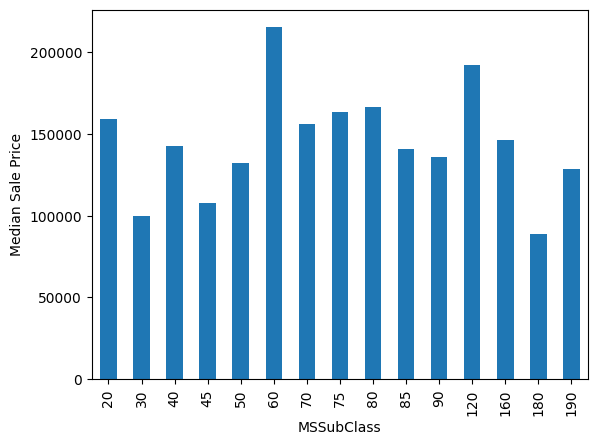

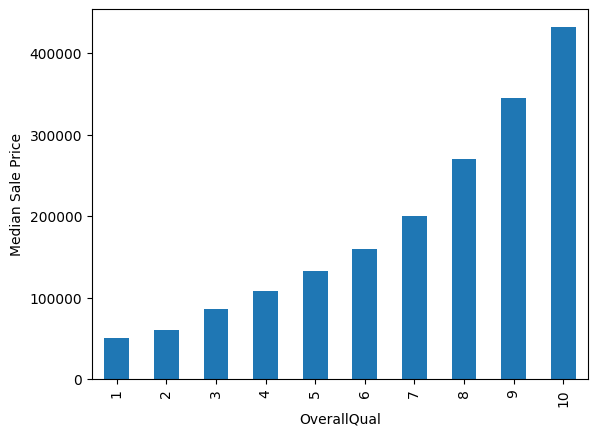

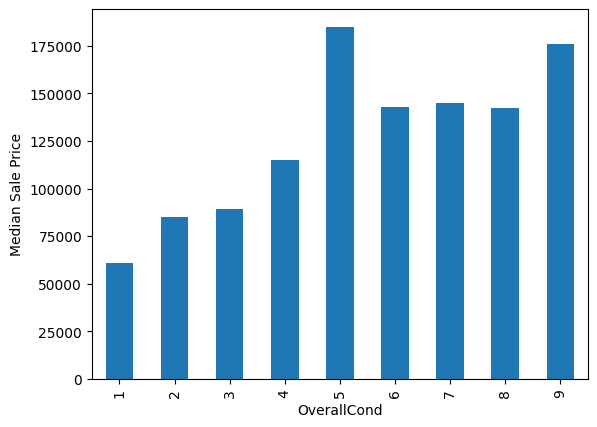

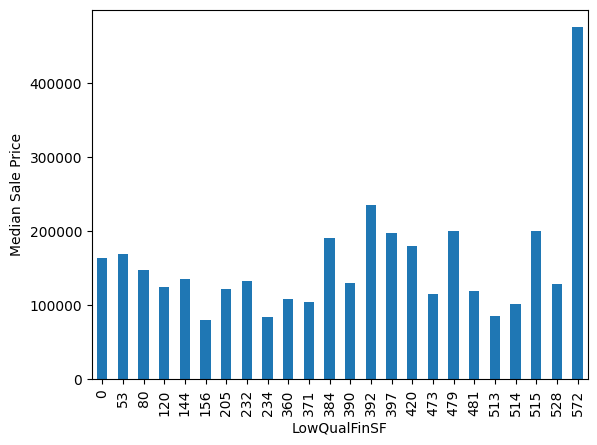

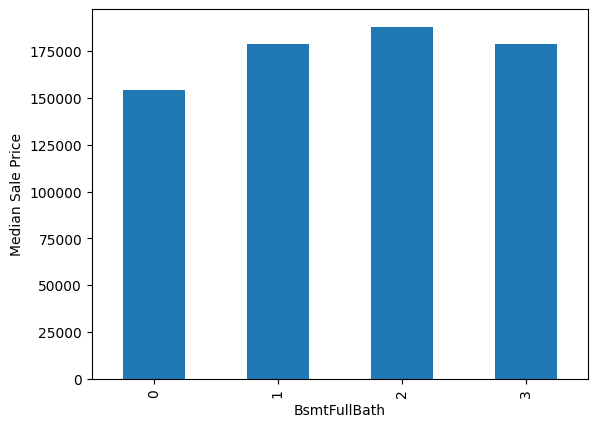

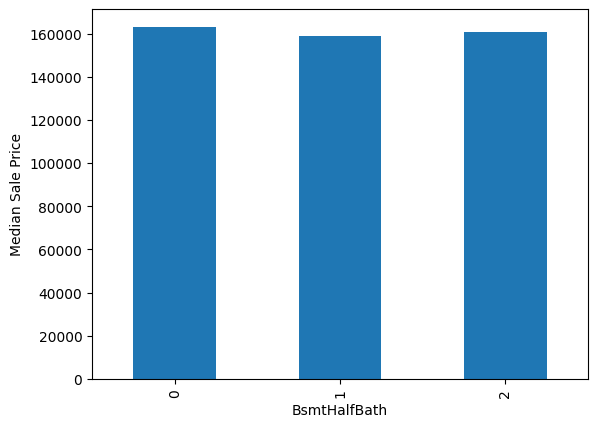

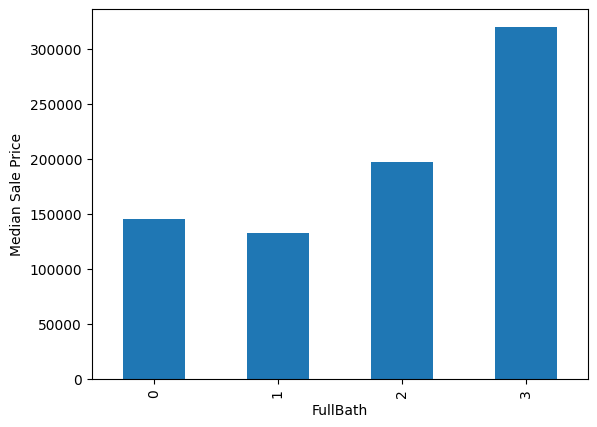

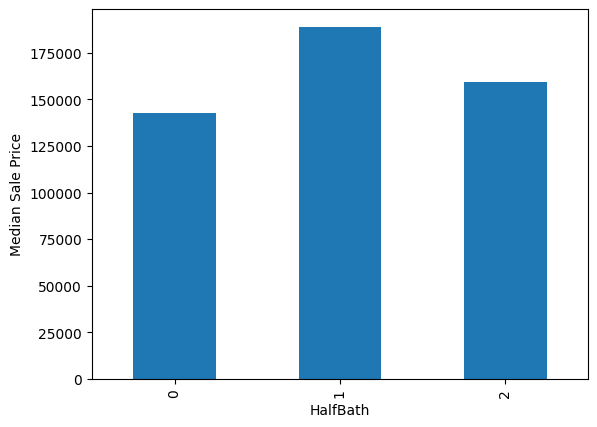

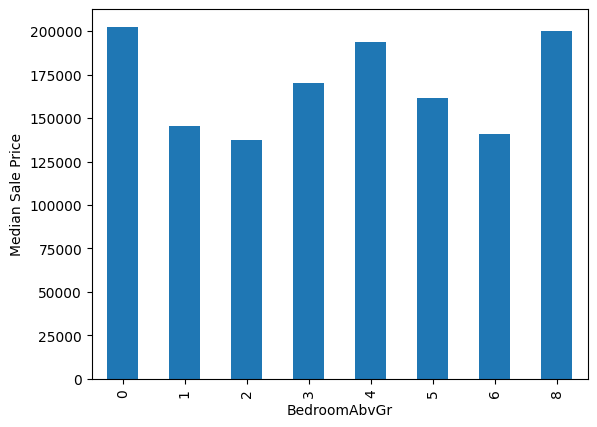

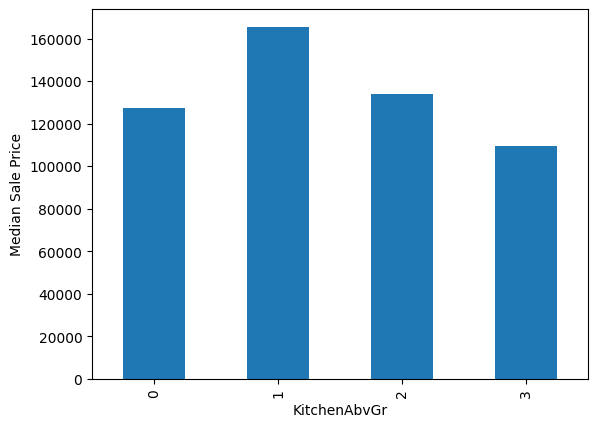

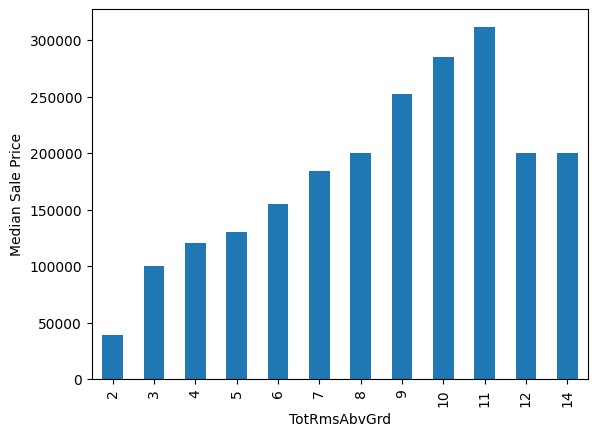

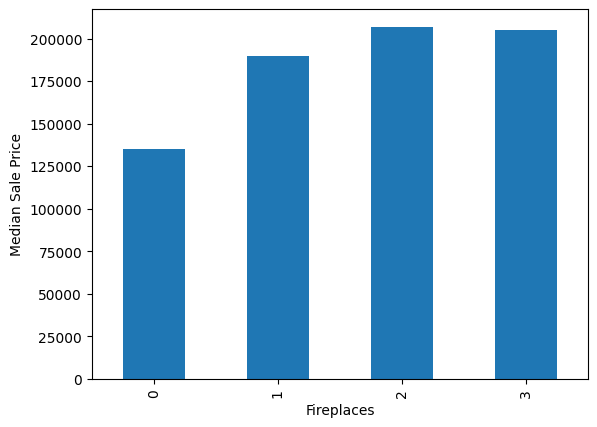

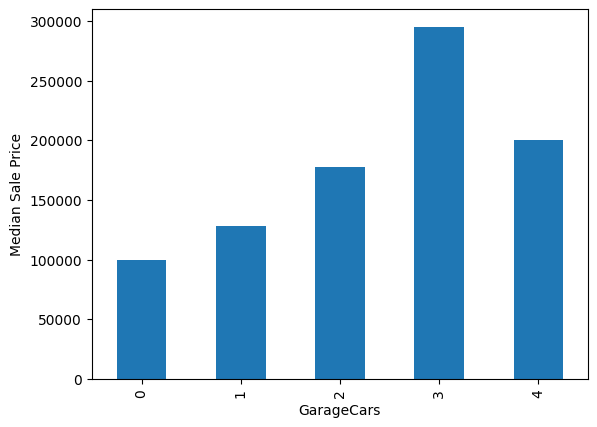

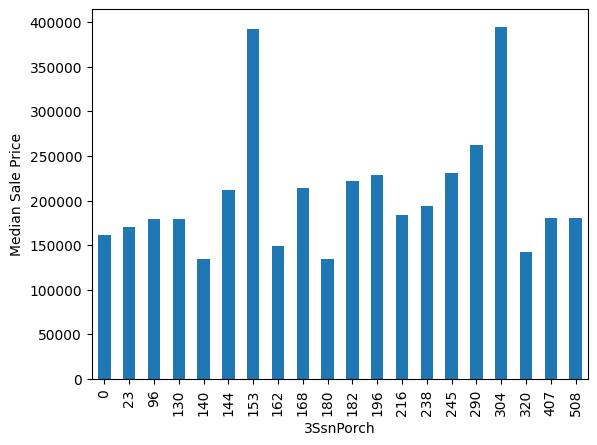

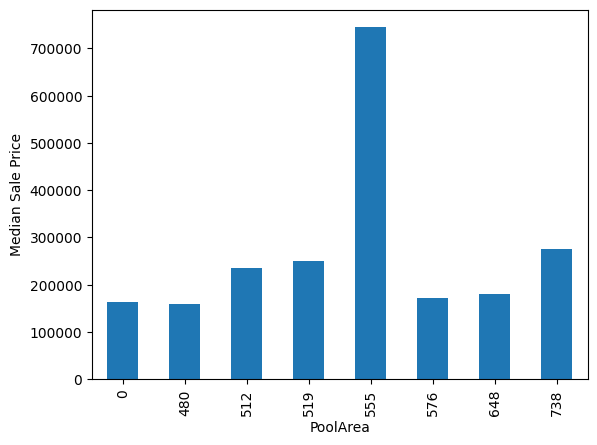

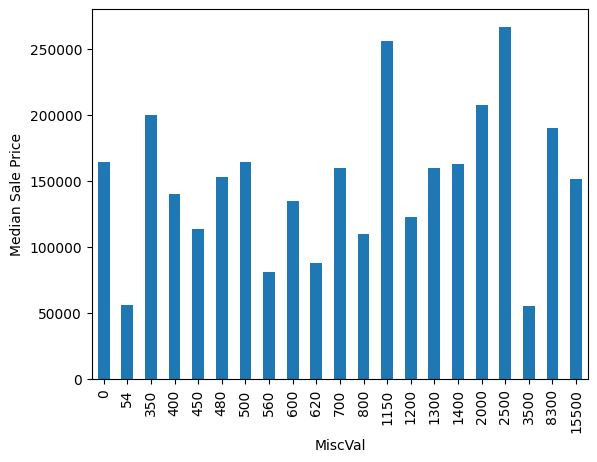

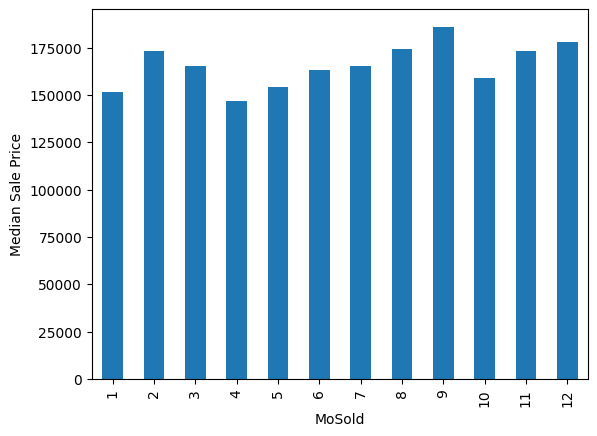

In [15]:
for feature in discrete_features:
    df_copy = train_df.copy()
    df_copy.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Median Sale Price")
    plt.show()

### Continuous Variables / Features


In [16]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + temporal_features + ["Id"]]
print(f"Number of continuous variables/features: {len(continuous_features)}")

Number of continuous variables/features: 16


In [17]:
train_df[continuous_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


#### Analysing the continuous features by plotting histograms to understand the distribution


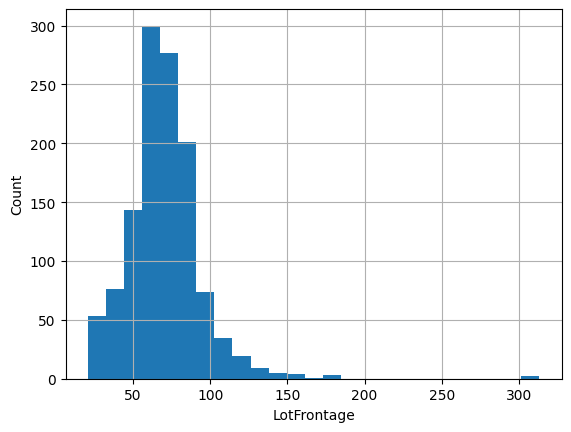

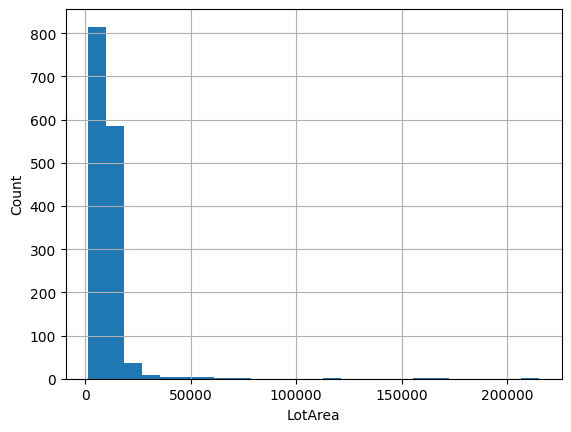

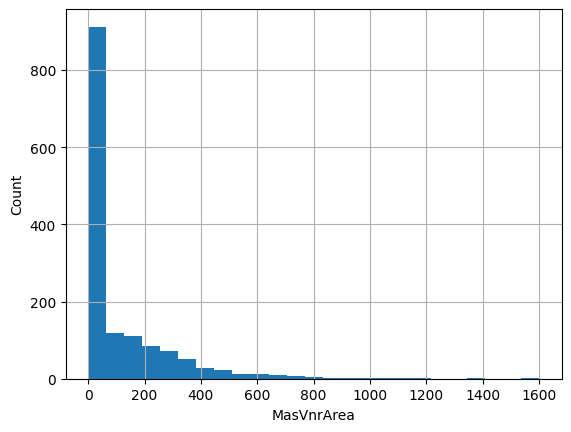

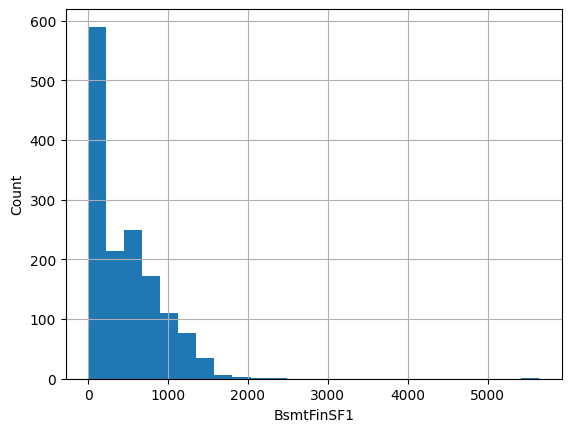

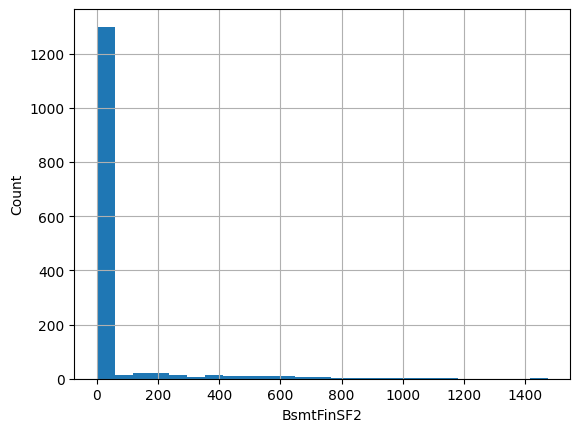

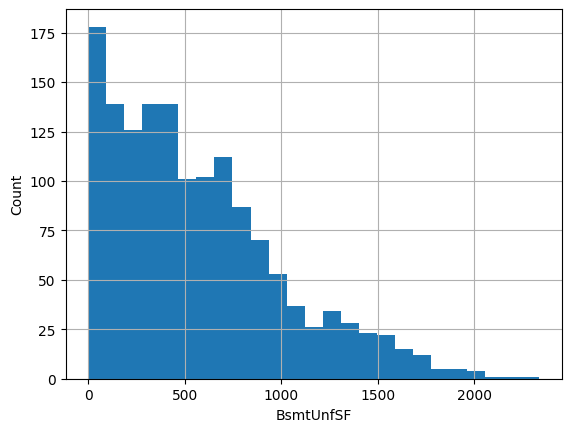

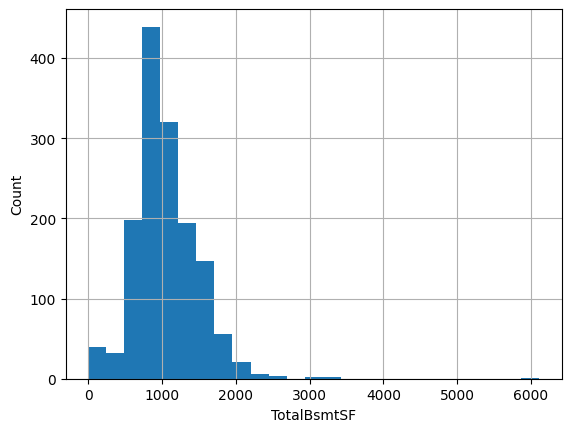

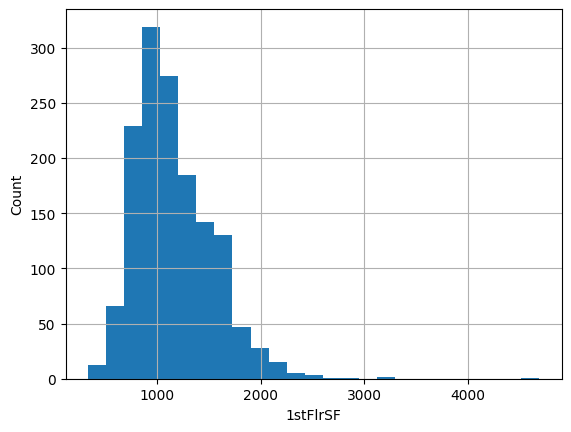

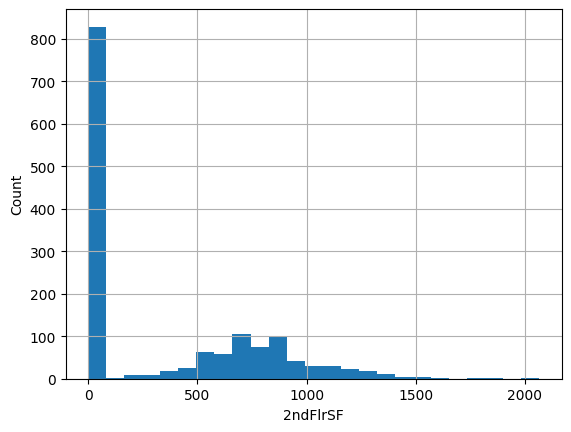

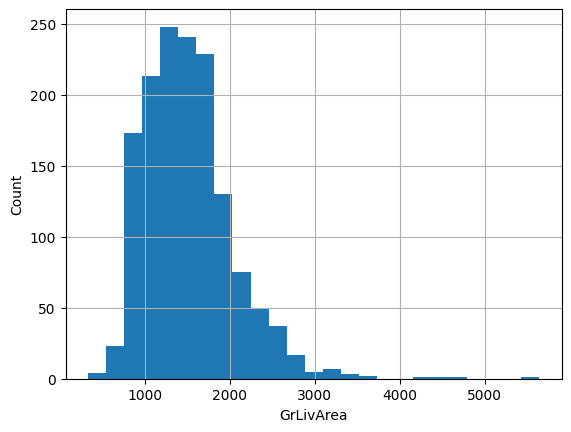

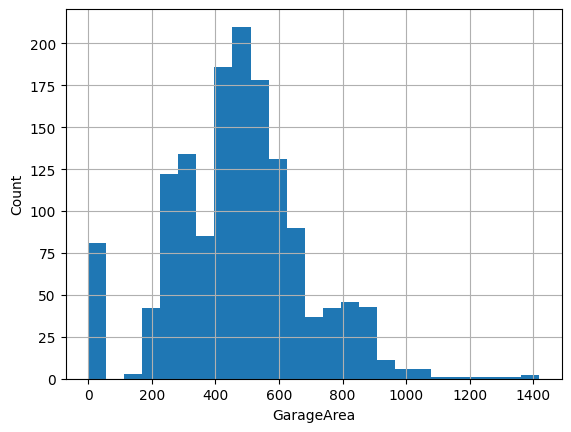

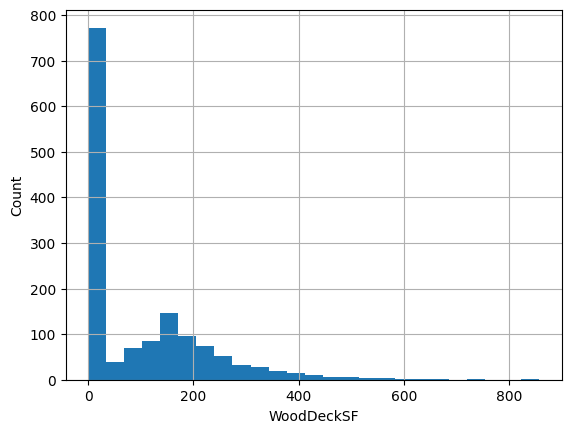

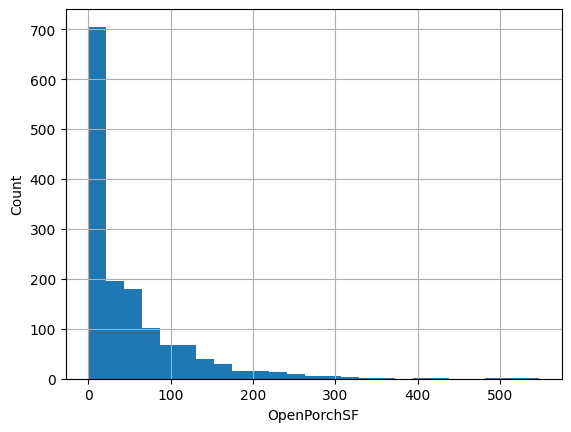

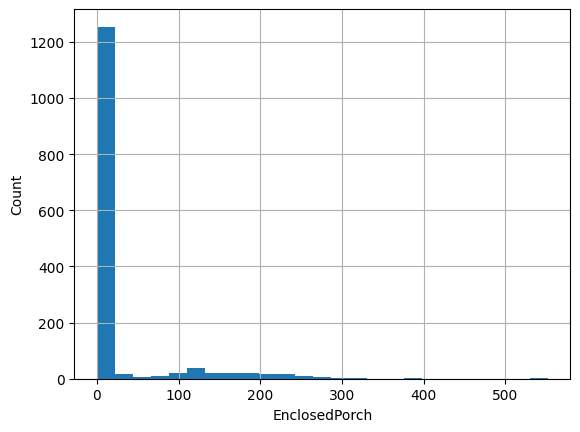

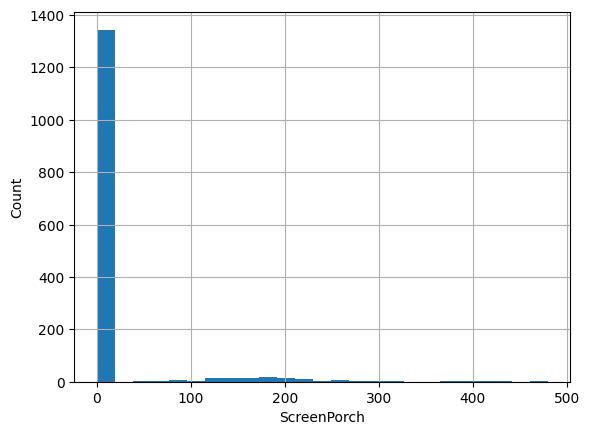

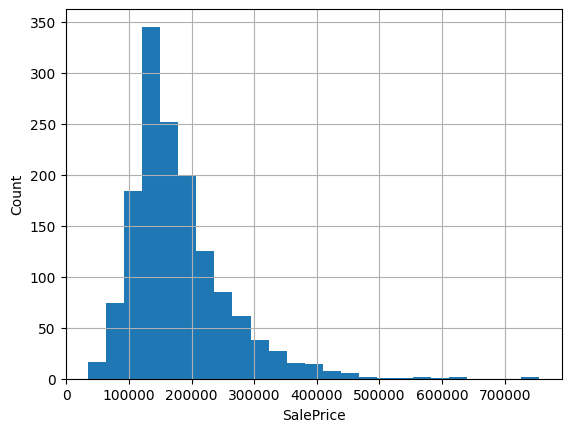

In [18]:
for feature in continuous_features:
    df_copy = train_df.copy()
    df_copy[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

#### Visualising continuous features after performing logarithmic transformation


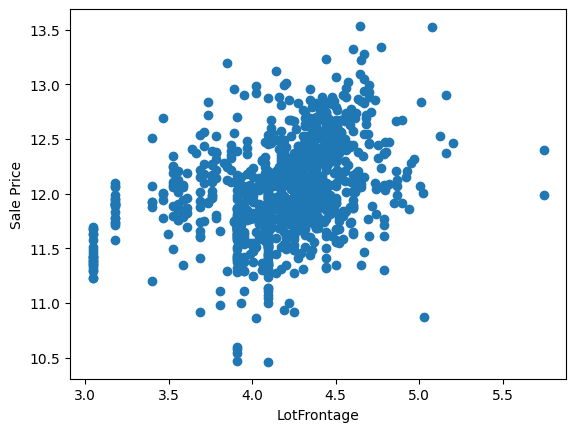

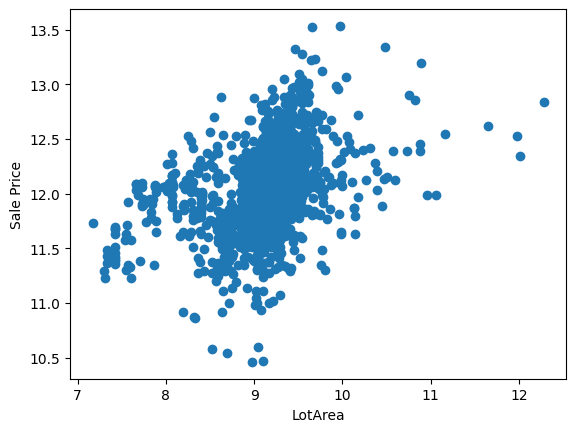

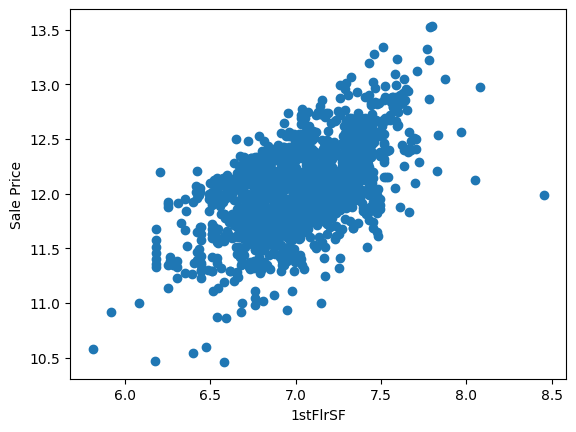

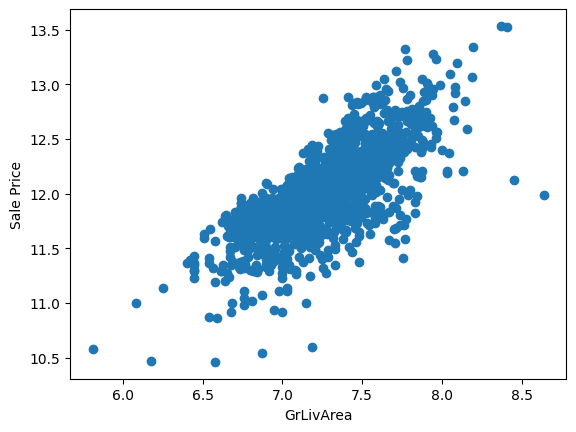

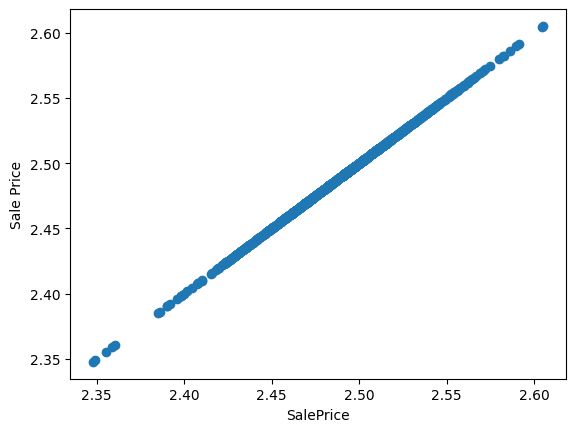

In [19]:
for feature in continuous_features:
    df_copy = train_df.copy()
    if 0 not in df_copy[feature].unique():
        df_copy[feature] = np.log(df_copy[feature])
        df_copy["SalePrice"] = np.log(df_copy["SalePrice"])
        plt.scatter(df_copy[feature], df_copy["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("Sale Price")
        plt.show()

### Outliers


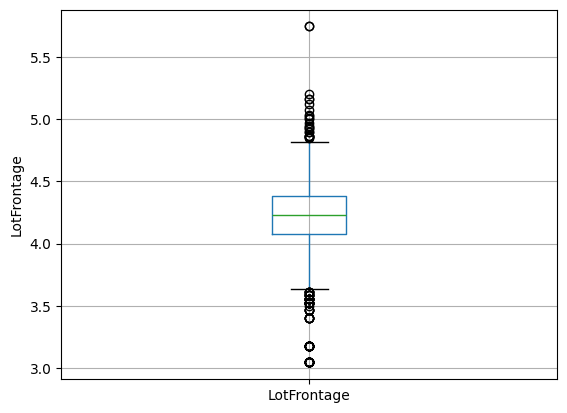

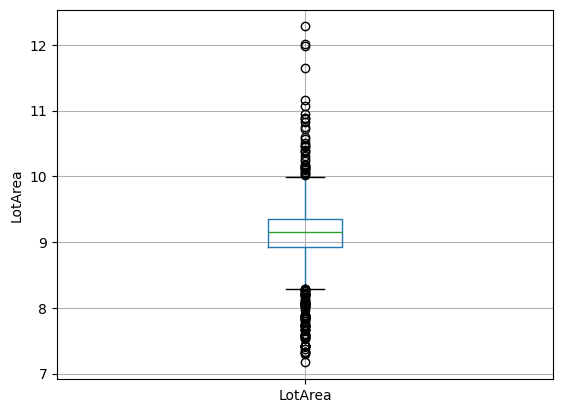

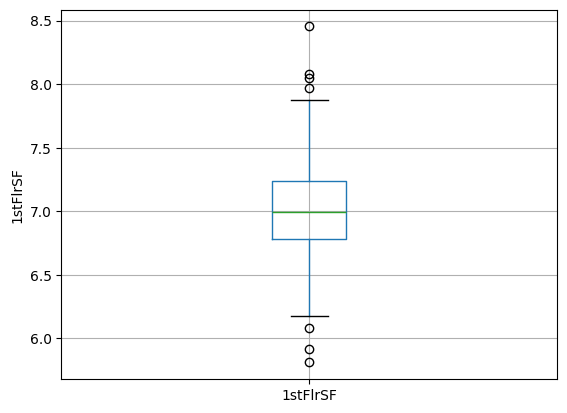

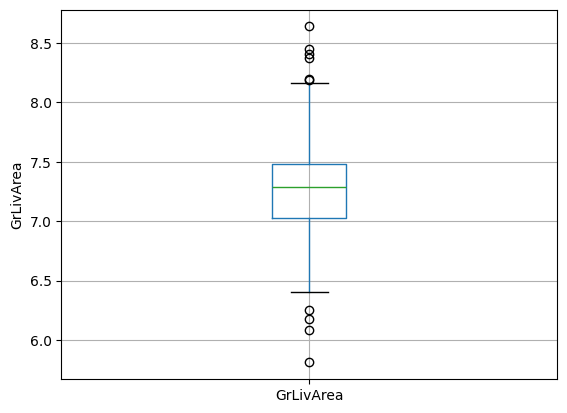

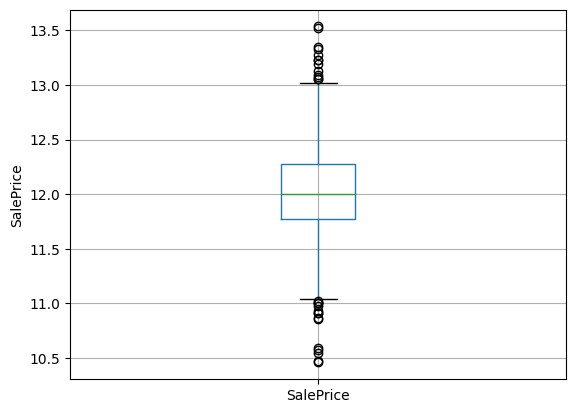

In [20]:
for feature in continuous_features:
    df_copy = train_df.copy()
    if 0 not in df_copy[feature].unique():
        df_copy[feature] = np.log(df_copy[feature])
        df_copy.boxplot(column=feature)
        plt.ylabel(feature)
        plt.show()

### Categorical Variables / Features


In [21]:
categorical_features = [col for col in train_df.columns if train_df[col].dtype == 'O']
print(f"Number of categorical variables/features: {len(categorical_features)}")

Number of categorical variables/features: 43


In [22]:
train_df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
for feature in categorical_features:
    print(f"Number of categories in {feature}: {len(train_df[feature].unique())}")

Number of categories in MSZoning: 5
Number of categories in Street: 2
Number of categories in Alley: 3
Number of categories in LotShape: 4
Number of categories in LandContour: 4
Number of categories in Utilities: 2
Number of categories in LotConfig: 5
Number of categories in LandSlope: 3
Number of categories in Neighborhood: 25
Number of categories in Condition1: 9
Number of categories in Condition2: 8
Number of categories in BldgType: 5
Number of categories in HouseStyle: 8
Number of categories in RoofStyle: 6
Number of categories in RoofMatl: 8
Number of categories in Exterior1st: 15
Number of categories in Exterior2nd: 16
Number of categories in MasVnrType: 4
Number of categories in ExterQual: 4
Number of categories in ExterCond: 5
Number of categories in Foundation: 6
Number of categories in BsmtQual: 5
Number of categories in BsmtCond: 5
Number of categories in BsmtExposure: 5
Number of categories in BsmtFinType1: 7
Number of categories in BsmtFinType2: 7
Number of categories in H

#### Relationship between categorical features and Sale Price


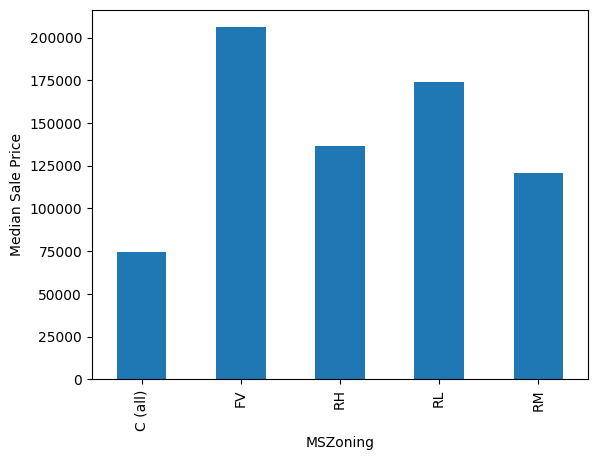

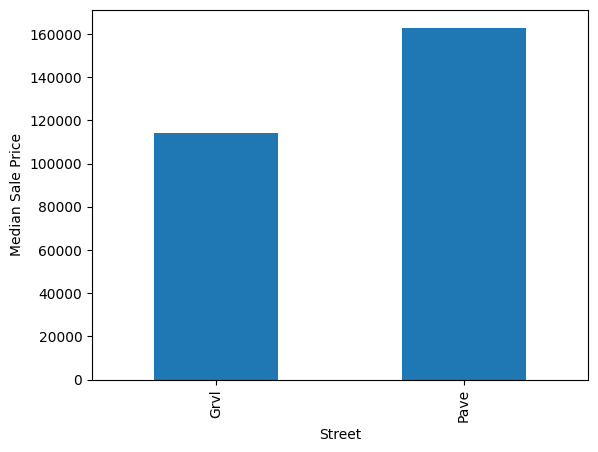

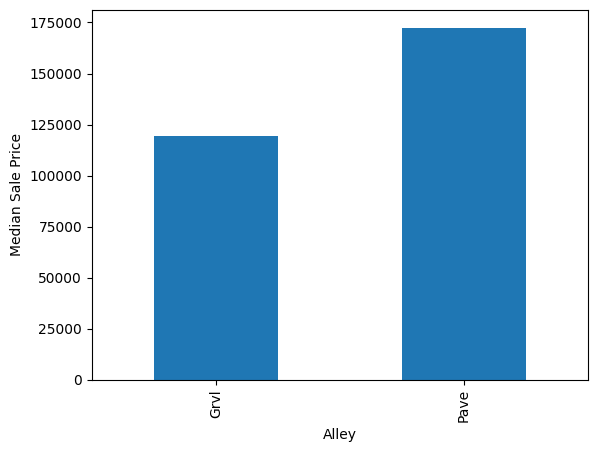

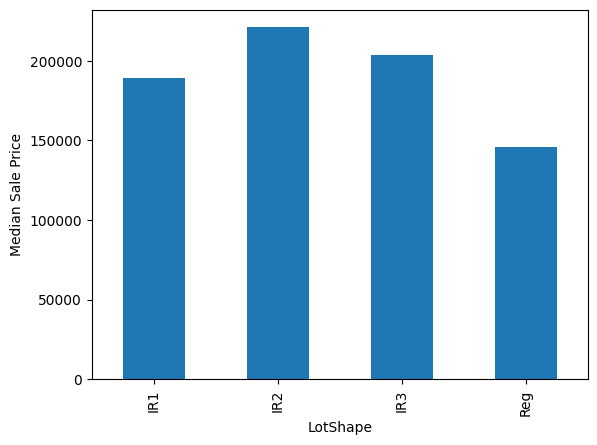

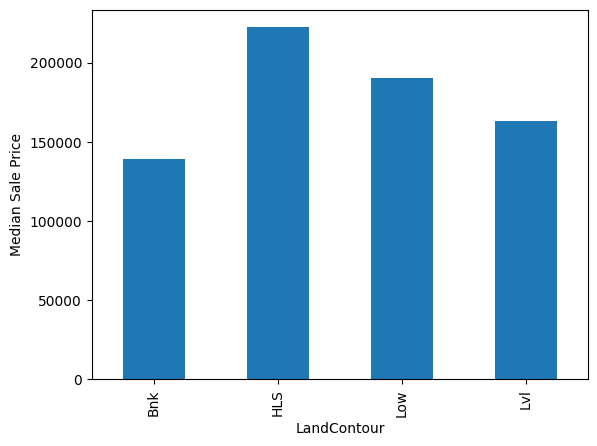

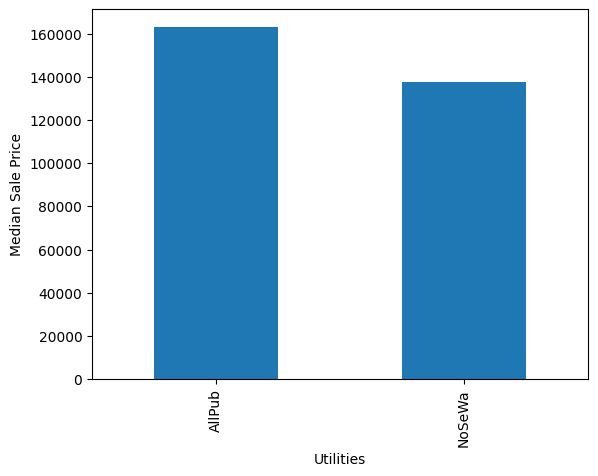

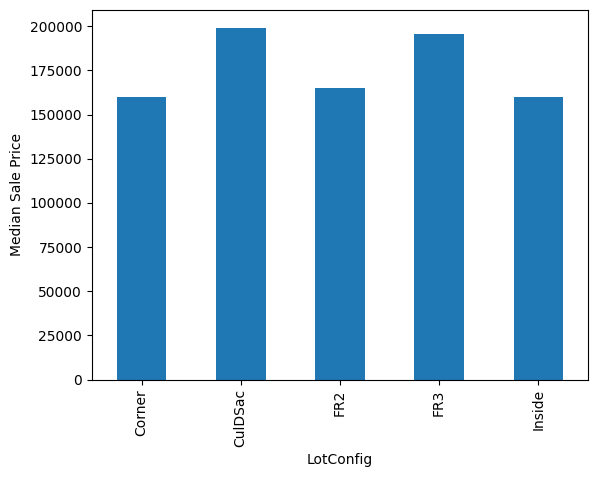

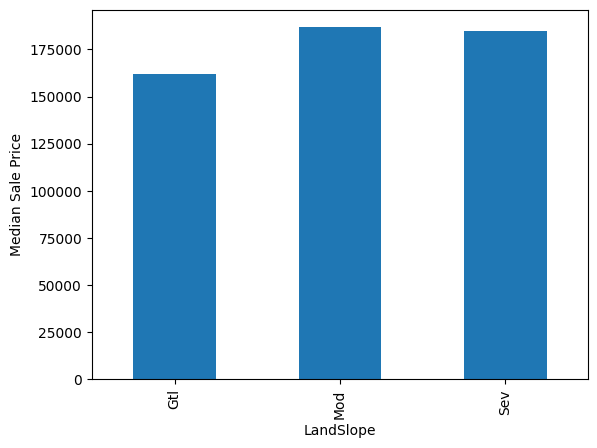

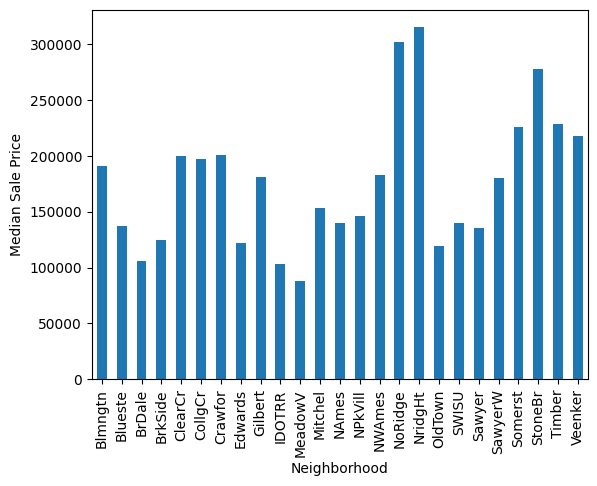

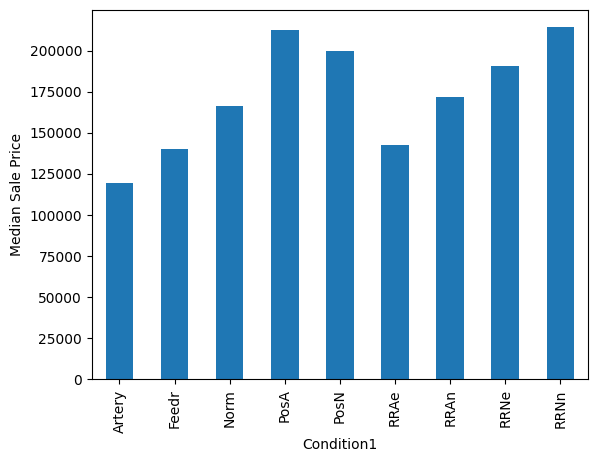

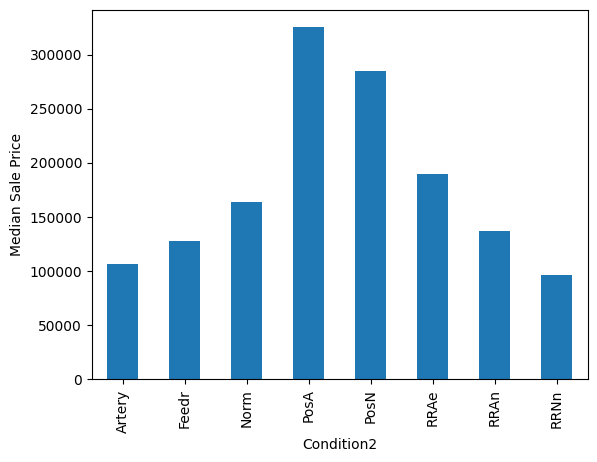

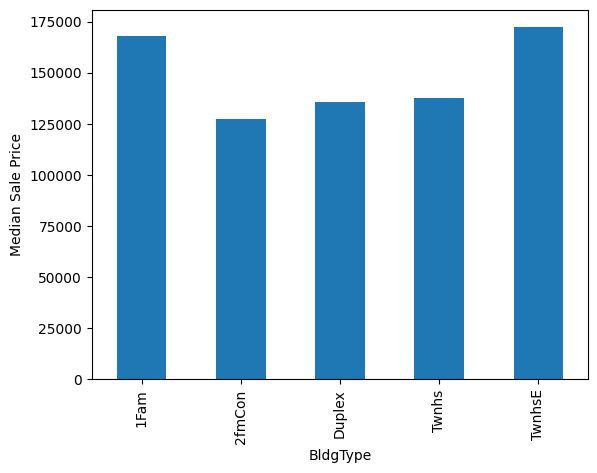

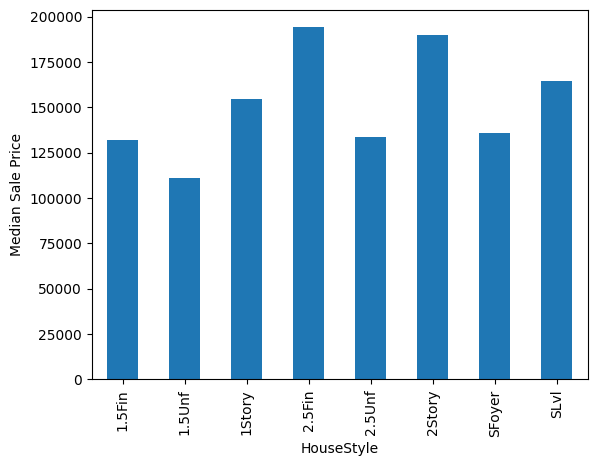

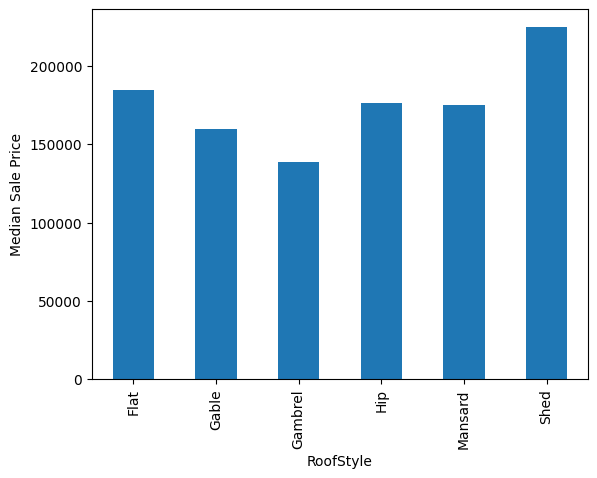

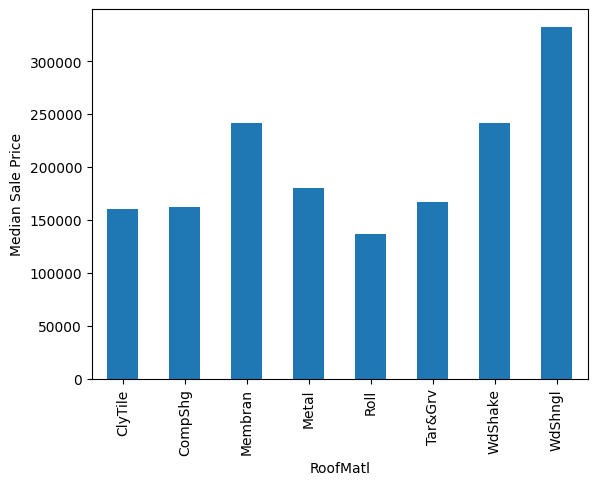

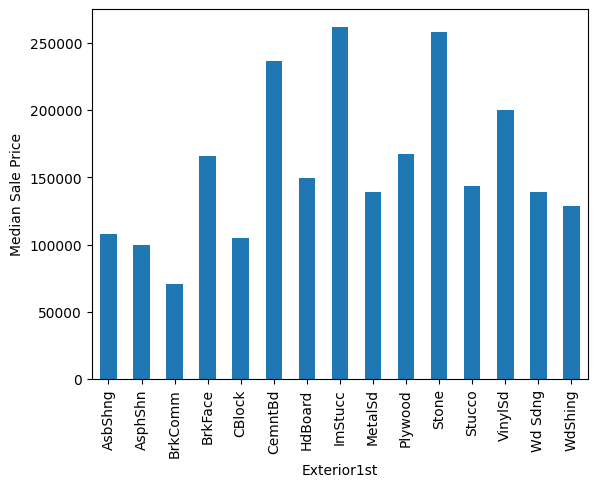

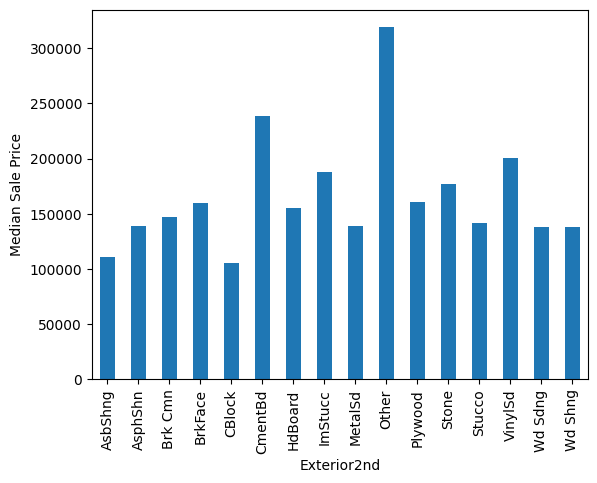

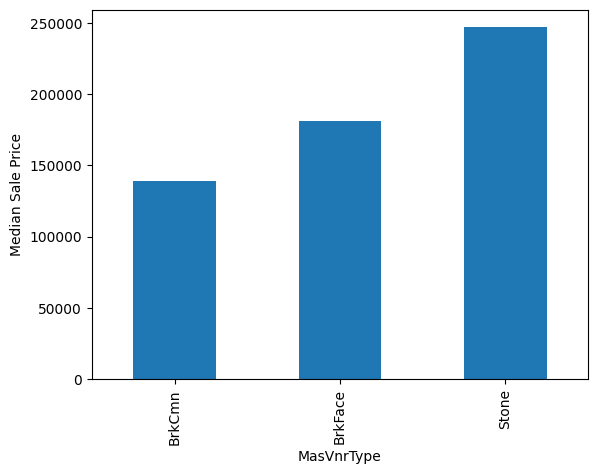

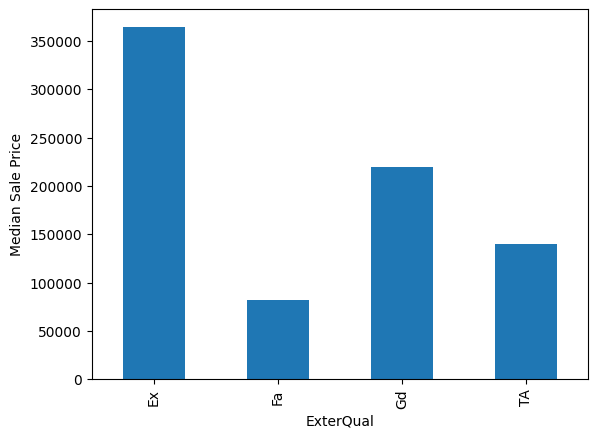

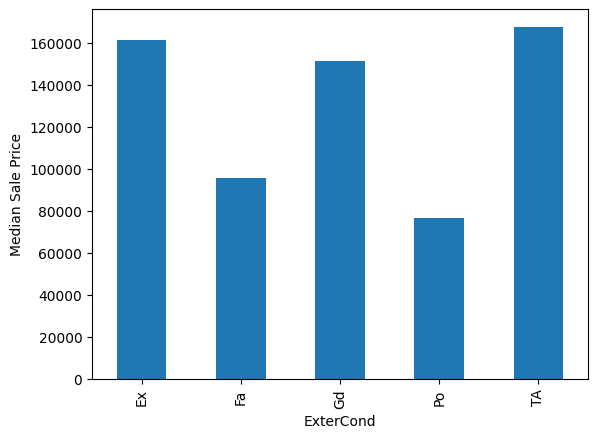

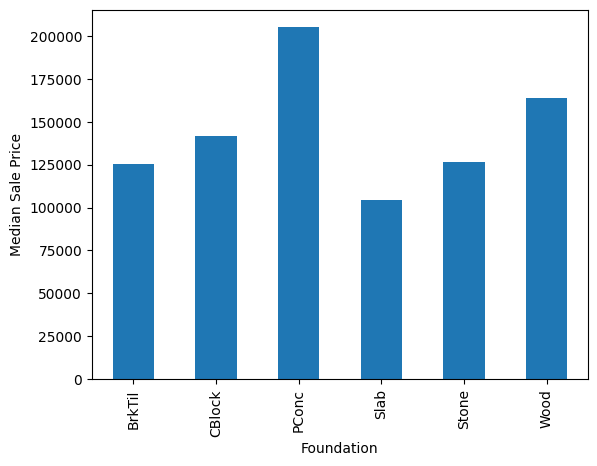

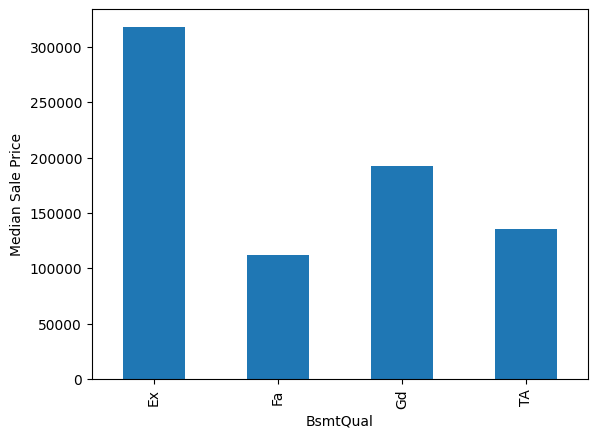

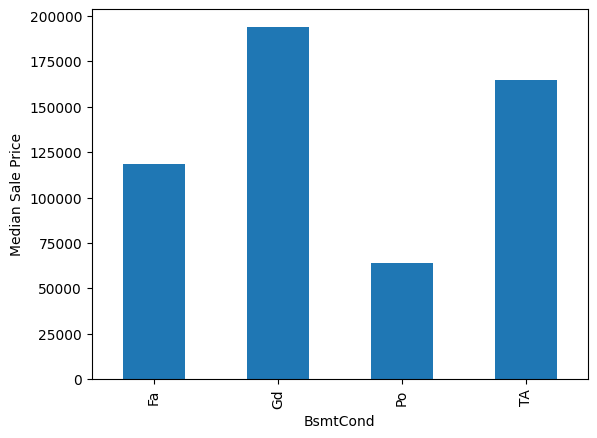

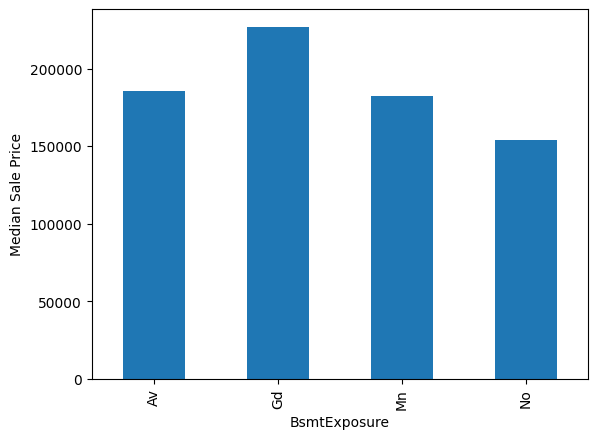

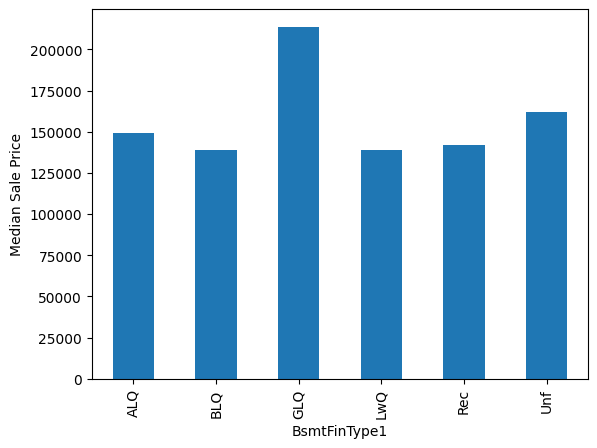

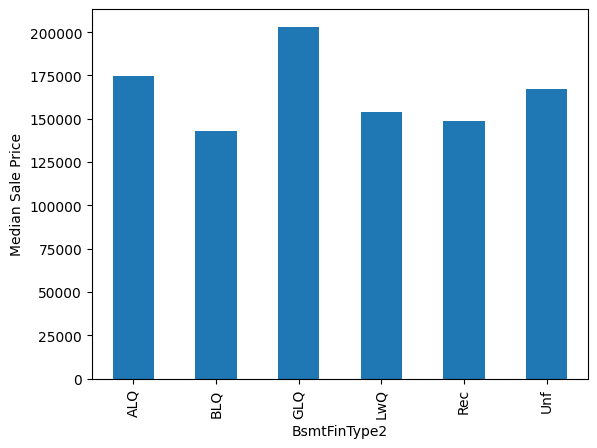

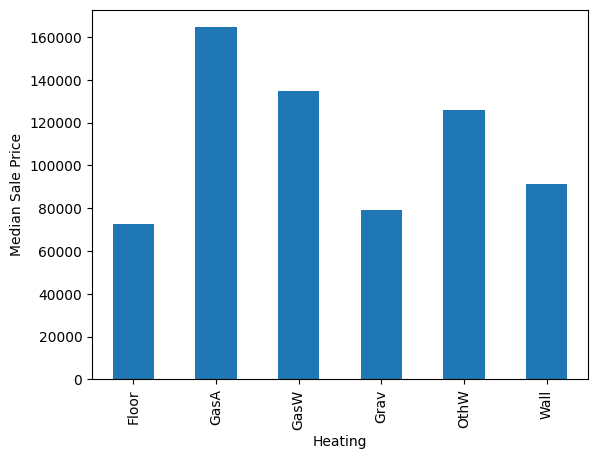

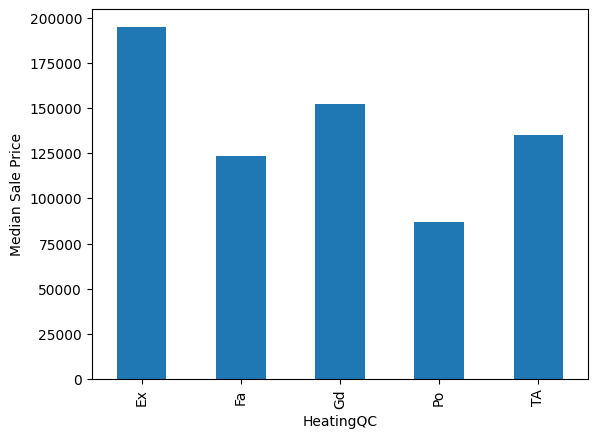

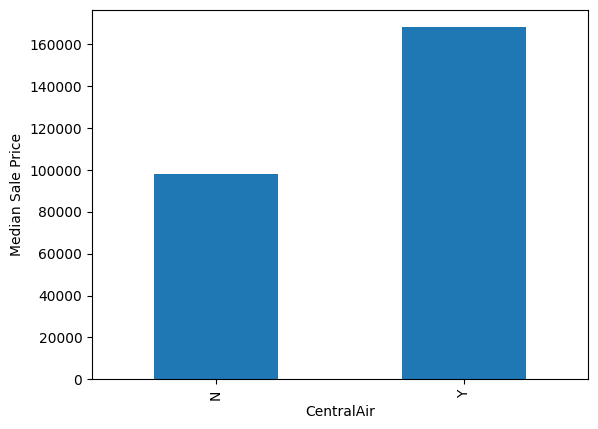

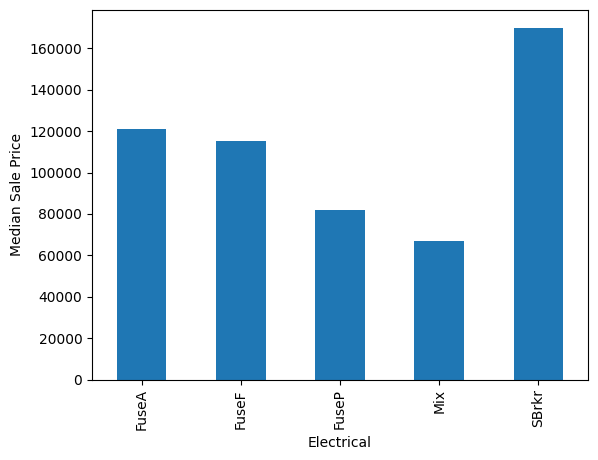

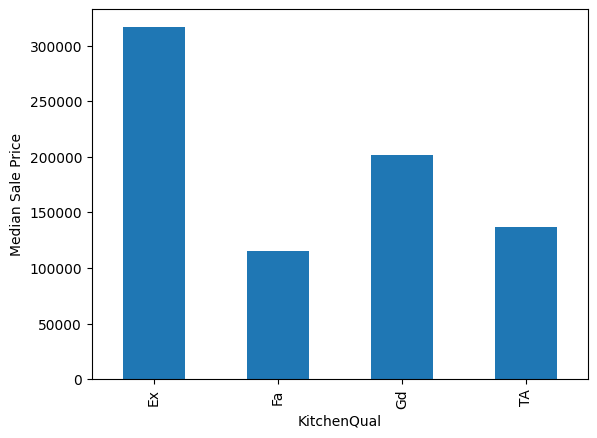

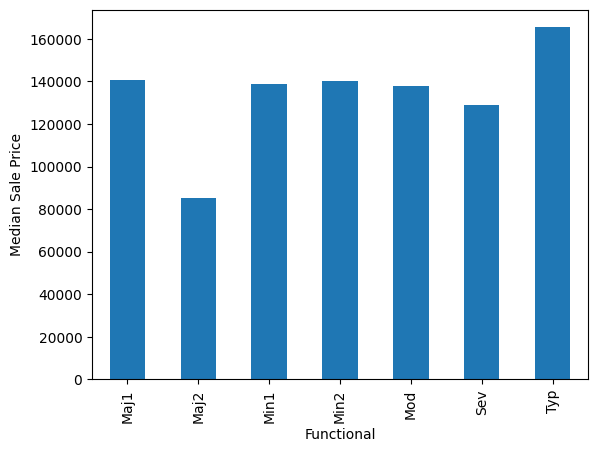

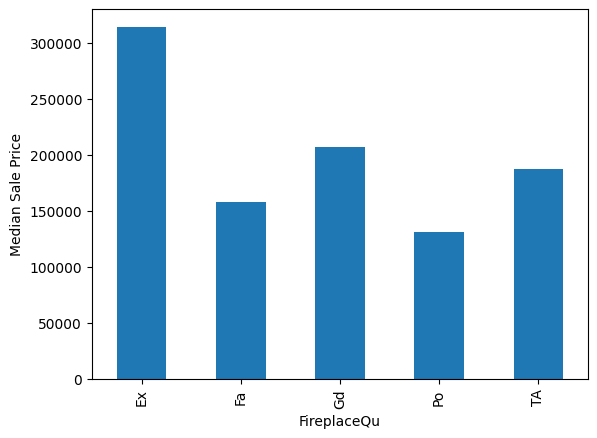

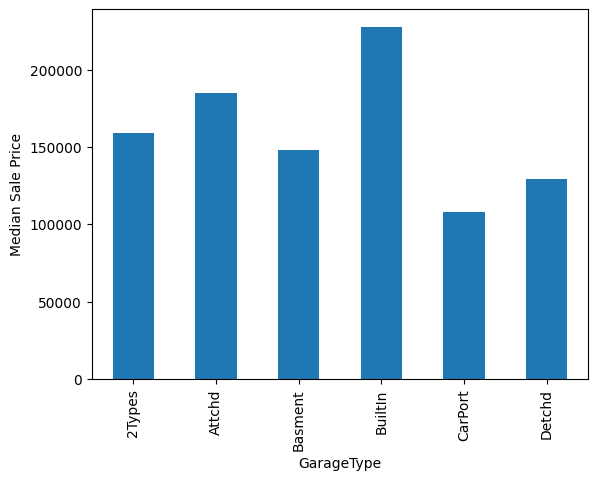

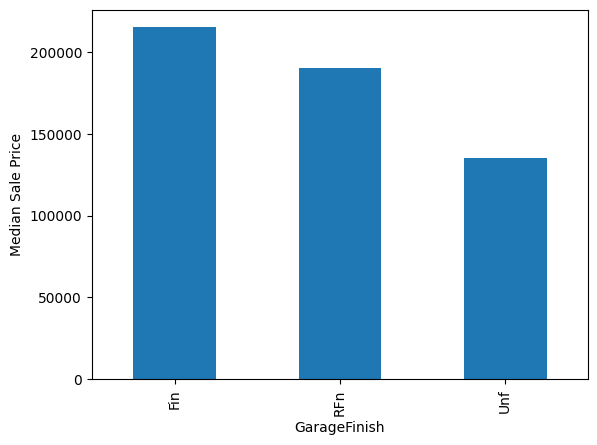

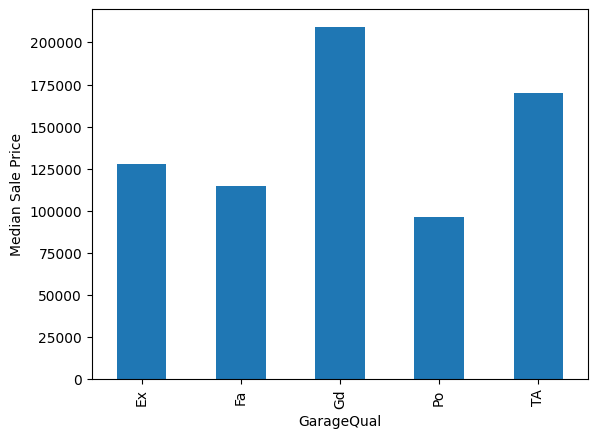

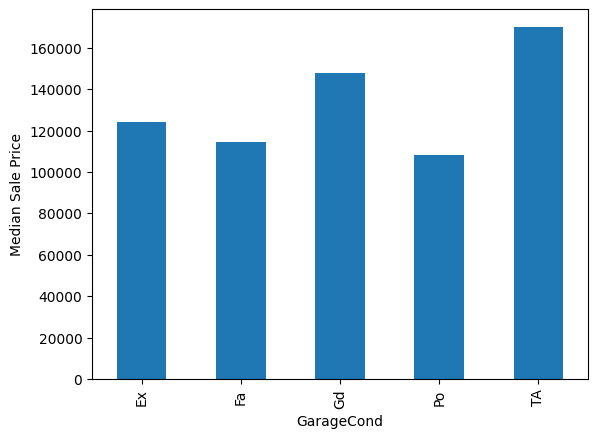

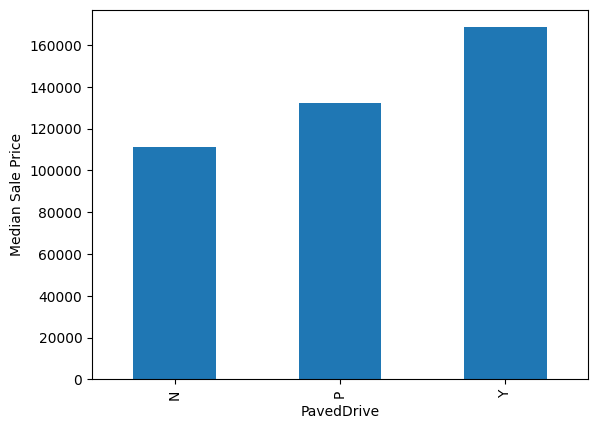

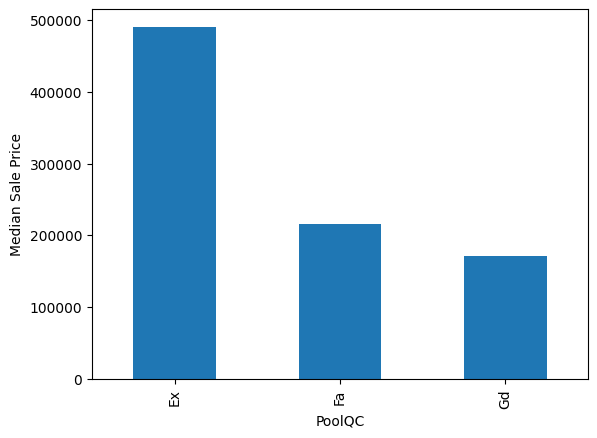

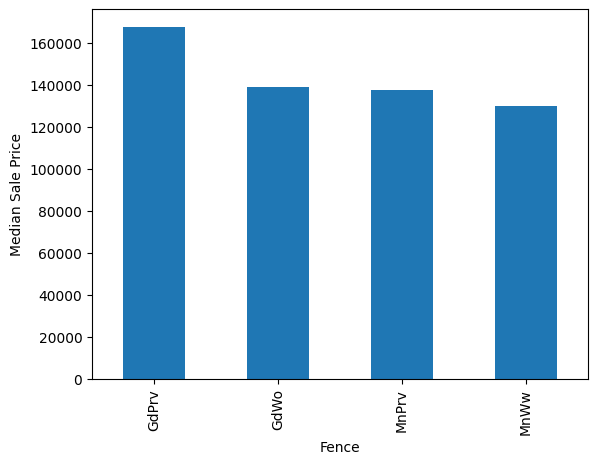

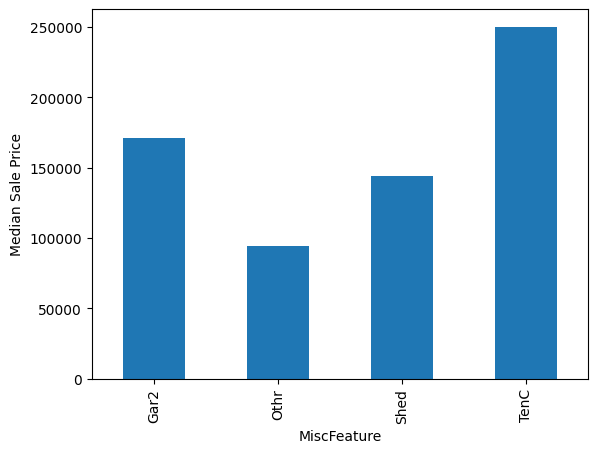

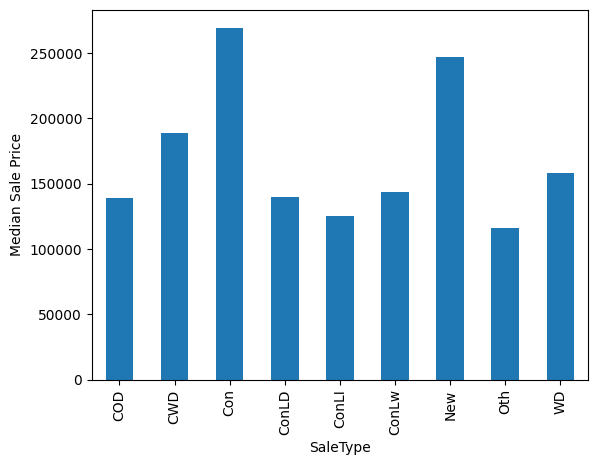

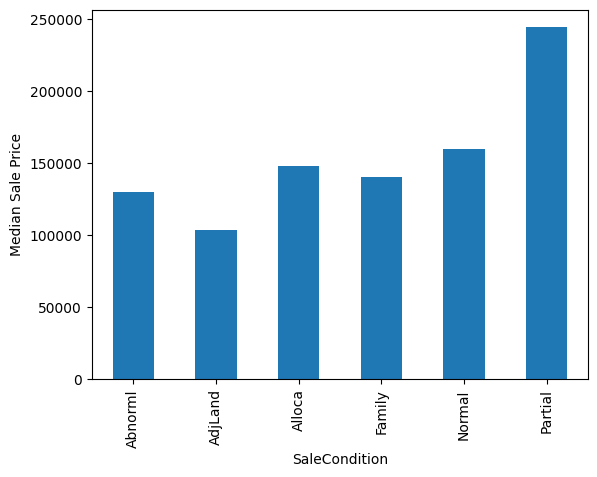

In [24]:
for feature in categorical_features:
    df_copy = train_df.copy()
    df_copy.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Median Sale Price")
    plt.show()

## FEATURE ENGINEERING


In [25]:
def null_features(dataset, features):
    return [feature for feature in features if dataset[feature].isnull().any()]

In [26]:
def display_missing_percentage(dataset, features):
    for null_feature in null_features(dataset, features):
        missing_percentage = dataset[null_feature].isnull().mean() * 100
        print(f"Percentage of missing values for {null_feature}: {missing_percentage}%")

### Handling Categorical Features


In [27]:
display_missing_percentage(train_df, categorical_features)

Percentage of missing values for Alley: 93.76712328767123%
Percentage of missing values for MasVnrType: 59.726027397260275%
Percentage of missing values for BsmtQual: 2.5342465753424657%
Percentage of missing values for BsmtCond: 2.5342465753424657%
Percentage of missing values for BsmtExposure: 2.6027397260273974%
Percentage of missing values for BsmtFinType1: 2.5342465753424657%
Percentage of missing values for BsmtFinType2: 2.6027397260273974%
Percentage of missing values for Electrical: 0.0684931506849315%
Percentage of missing values for FireplaceQu: 47.26027397260274%
Percentage of missing values for GarageType: 5.5479452054794525%
Percentage of missing values for GarageFinish: 5.5479452054794525%
Percentage of missing values for GarageQual: 5.5479452054794525%
Percentage of missing values for GarageCond: 5.5479452054794525%
Percentage of missing values for PoolQC: 99.52054794520548%
Percentage of missing values for Fence: 80.75342465753424%
Percentage of missing values for MiscF

In [28]:
display_missing_percentage(test_df, categorical_features)

Percentage of missing values for MSZoning: 0.2741603838245374%
Percentage of missing values for Alley: 92.66620973269363%
Percentage of missing values for Utilities: 0.1370801919122687%
Percentage of missing values for Exterior1st: 0.06854009595613435%
Percentage of missing values for Exterior2nd: 0.06854009595613435%
Percentage of missing values for MasVnrType: 61.27484578478409%
Percentage of missing values for BsmtQual: 3.015764222069911%
Percentage of missing values for BsmtCond: 3.0843043180260454%
Percentage of missing values for BsmtExposure: 3.015764222069911%
Percentage of missing values for BsmtFinType1: 2.878684030157642%
Percentage of missing values for BsmtFinType2: 2.878684030157642%
Percentage of missing values for KitchenQual: 0.06854009595613435%
Percentage of missing values for Functional: 0.1370801919122687%
Percentage of missing values for FireplaceQu: 50.03427004797807%
Percentage of missing values for GarageType: 5.20904729266621%
Percentage of missing values for 

In [29]:
def replace_categorical_features(dataset):
    null_categorical_features = null_features(dataset, categorical_features)
    data = dataset.copy()
    data[null_categorical_features] = data[null_categorical_features].fillna("Missing")
    return data

In [30]:
train_df = replace_categorical_features(train_df)
train_df[null_features(train_df, categorical_features)].isnull().sum()

Series([], dtype: float64)

In [31]:
test_df = replace_categorical_features(test_df)
test_df[null_features(test_df, categorical_features)].isnull().sum()

Series([], dtype: float64)

### Handling Numerical Features


In [32]:
display_missing_percentage(train_df, numerical_features)

Percentage of missing values for LotFrontage: 17.73972602739726%
Percentage of missing values for MasVnrArea: 0.547945205479452%
Percentage of missing values for GarageYrBlt: 5.5479452054794525%


In [33]:
numerical_features = [col for col in test_df.columns if test_df[col].dtypes in [np.int64, np.float64]]
null_numerical_features = [feature for feature in numerical_features if test_df[feature].isnull().any()]
for null_feature in null_numerical_features:
    missing_percentage = test_df[null_feature].isnull().mean() * 100
    print(f"Percentage of missing values for {null_feature}: {missing_percentage}%")

Percentage of missing values for LotFrontage: 15.558601782042494%
Percentage of missing values for MasVnrArea: 1.0281014393420151%
Percentage of missing values for BsmtFinSF1: 0.06854009595613435%
Percentage of missing values for BsmtFinSF2: 0.06854009595613435%
Percentage of missing values for BsmtUnfSF: 0.06854009595613435%
Percentage of missing values for TotalBsmtSF: 0.06854009595613435%
Percentage of missing values for BsmtFullBath: 0.1370801919122687%
Percentage of missing values for BsmtHalfBath: 0.1370801919122687%
Percentage of missing values for GarageYrBlt: 5.346127484578479%
Percentage of missing values for GarageCars: 0.06854009595613435%
Percentage of missing values for GarageArea: 0.06854009595613435%


In [34]:
def replace_numerical_features(dataset, features):
    data = dataset.copy()
    for feature in features:
        median = data[feature].median()
        data[feature + "_isnull"] = np.where(data[feature].isnull(), 1, 0)
        data[feature] = data[feature].fillna(median)
    return data

In [35]:
train_df = replace_numerical_features(train_df, null_features(train_df, numerical_features))
train_df[null_features(train_df, numerical_features)].isnull().sum()

Series([], dtype: float64)

In [36]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [37]:
test_df = replace_numerical_features(test_df, null_numerical_features)
test_df[null_numerical_features].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [38]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,BsmtFinSF1_isnull,BsmtFinSF2_isnull,BsmtUnfSF_isnull,TotalBsmtSF_isnull,BsmtFullBath_isnull,BsmtHalfBath_isnull,GarageYrBlt_isnull,GarageCars_isnull,GarageArea_isnull
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,Missing,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


### Handling Temporal Features


In [39]:
def replace_temporal_features(dataset, features):
    data = dataset.copy()
    for feature in features:
        if feature != "YrSold":
            data[feature] = data["YrSold"] - data[feature]
    return data

In [40]:
train_df = replace_temporal_features(train_df, temporal_features)

In [41]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [42]:
test_df = replace_temporal_features(test_df, temporal_features)

In [43]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,BsmtFinSF1_isnull,BsmtFinSF2_isnull,BsmtUnfSF_isnull,TotalBsmtSF_isnull,BsmtFullBath_isnull,BsmtHalfBath_isnull,GarageYrBlt_isnull,GarageCars_isnull,GarageArea_isnull
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,Missing,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,Missing,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


### Performing Logarithmic Transformations on Continuous Features


In [44]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [45]:
nonzero_continuous_features = [feature for feature in continuous_features if 0 not in train_df[feature].unique()]
for feature in nonzero_continuous_features:
    train_df[feature] = np.log(train_df[feature])
for feature in nonzero_continuous_features:
    if feature != "SalePrice":
        test_df[feature] = np.log(test_df[feature])

In [46]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


### Handling Rare Categorical Features


In [47]:
def handle_rare_categorical_features(dataset, features, threshold):
    data = dataset.copy()
    for feature in features:
        counts = data[feature].value_counts(normalize=True)
        rare_categories = counts[counts > threshold].index
        data[feature] = np.where(data[feature].isin(rare_categories), data[feature], "Rare")
    return data

In [48]:
train_df = handle_rare_categorical_features(train_df, categorical_features, 0.01)
train_df["Utilities"].value_counts()

Utilities
AllPub    1459
Rare         1
Name: count, dtype: int64

In [49]:
test_df = handle_rare_categorical_features(test_df, categorical_features, 0.01)
test_df["Utilities"].value_counts()

Utilities
AllPub    1457
Rare         2
Name: count, dtype: int64

In [50]:
def encode_categorical_features(dataset, features):
    data = dataset.copy()
    for feature in features:
        labels_ordered = data[feature].value_counts(normalize=True).sort_values().index
        labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
        data[feature] = data[feature].map(labels_ordered)
    return data

In [51]:
train_df = encode_categorical_features(train_df, categorical_features)

In [52]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,60,4,4.174387,9.041922,1,2,3,3,1,4,2,21,5,1,4,4,7,5,5,5,2,1,10,10,2,196.0,2,3,4,3,4,4,5,706,6,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,5,5,5.0,2,2,548,3,3,2,0,61,0,0,0,0,1,4,2,0,2,2008,3,4,12.247694,0,0,0
1,2,20,4,4.382027,9.169518,1,2,3,3,1,1,2,3,4,1,4,5,6,8,31,31,2,1,8,9,3,0.0,3,3,3,3,4,2,4,978,6,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,4,1,3,5,31.0,2,2,460,3,3,2,298,0,0,0,0,0,1,4,2,0,5,2007,3,4,12.109011,0,0,0
2,3,60,4,4.219508,9.328123,1,2,2,3,1,4,2,21,5,1,4,4,7,5,7,6,2,1,10,10,2,162.0,2,3,4,3,4,1,5,486,6,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,5,7.0,2,2,608,3,3,2,0,42,0,0,0,0,1,4,2,0,9,2008,3,4,12.317167,0,0,0
3,4,70,4,4.094345,9.164296,1,2,2,3,1,3,2,11,5,1,4,4,7,5,91,36,2,1,7,4,3,0.0,3,3,2,4,3,4,4,216,6,0,540,756,2,2,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,4,8.0,3,3,642,3,3,2,0,35,272,0,0,0,1,4,2,0,2,2006,3,2,11.849398,0,0,0
4,5,60,4,4.430817,9.565214,1,2,2,3,1,1,2,9,5,1,4,4,8,5,8,8,2,1,10,10,2,350.0,2,3,4,3,4,3,5,655,6,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,5,8.0,2,3,836,3,3,2,192,84,0,0,0,0,1,4,2,0,12,2008,3,4,12.429216,0,0,0


In [53]:
test_df = encode_categorical_features(test_df, categorical_features)

## Feature Scaling


In [54]:
feature_scale = [feature for feature in train_df.columns if feature not in ["Id", "SalePrice"]]
scaler = MinMaxScaler()

In [55]:
scaler.fit(train_df[feature_scale])
train_data = pd.concat([train_df[["Id", "SalePrice"]].reset_index(drop=True), pd.DataFrame(scaler.transform(train_df[feature_scale]), columns=feature_scale)], axis=1)
train_data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,12.247694,0.235294,1.0,0.418208,0.366344,1.0,1.0,1.000000,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.036765,0.098361,1.0,1.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,1.00,1.00,0.833333,0.125089,1.0,0.0,0.064212,0.140098,1.0,1.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,1.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,1.0,0.0,0.0,0.0
1,2,12.109011,0.000000,1.0,0.495064,0.391317,1.0,1.0,1.000000,1.0,1.0,0.25,1.0,0.136364,0.8,1.0,1.0,1.0,0.555556,0.875,0.227941,0.524590,1.0,1.0,0.8,0.9,1.000000,0.00000,1.000000,1.0,0.75,0.75,1.00,0.50,0.666667,0.173281,1.0,0.0,0.121575,0.206547,1.0,1.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.6,1.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,1.0,0.0,0.0,0.0
2,3,12.317167,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.666667,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.051471,0.114754,1.0,1.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,1.00,0.25,0.833333,0.086109,1.0,0.0,0.185788,0.150573,1.0,1.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,1.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,1.0,0.0,0.0,0.0
3,4,11.849398,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.666667,1.0,1.0,0.75,1.0,0.500000,1.0,1.0,1.0,0.8,0.666667,0.500,0.669118,0.606557,1.0,1.0,0.7,0.4,1.000000,0.00000,1.000000,1.0,0.50,1.00,0.75,1.00,0.666667,0.038271,1.0,0.0,0.231164,0.123732,1.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.5,0.0,0.0,0.0
4,5,12.429216,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.666667,1.0,1.0,0.25,1.0,0.409091,1.0,1.0,1.0,0.8,0.777778,0.500,0.058824,0.147541,1.0,1.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,1.00,0.75,0.833333,0.116052,1.0,0.0,0.209760,0.187398,1.0,1.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,1.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,1.0,0.0,0.0,0.0


In [56]:
train_data.to_csv("data/X_train.csv", index=False)

In [57]:
scaler.fit(test_df[feature_scale])
test_data = pd.concat([test_df[["Id"]].reset_index(drop=True), pd.DataFrame(scaler.transform(test_df[feature_scale]), columns=feature_scale)], axis=1)
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1461,0.000000,0.0,0.593445,0.566360,1.0,1.0,1.000000,1.000000,1.0,1.00,1.0,1.00,0.833333,1.0,1.00,1.0,0.444444,0.625,0.384615,0.822581,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.0,0.75,1.00,1.0,1.0,0.500000,0.116708,0.5,0.094364,0.126168,0.173111,1.0,0.75,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.00,0.166667,1.0,0.00,1.0,1.0,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.75,1.0,0.000000,0.454545,1.0,1.0,1.0,0.0,0.0,0.0
1,1462,0.000000,1.0,0.598957,0.622527,1.0,1.0,0.666667,1.000000,1.0,0.75,1.0,1.00,1.000000,1.0,1.00,1.0,0.555556,0.625,0.407692,0.870968,0.5,1.0,0.7,0.727273,0.666667,0.083721,1.000000,1.0,0.75,1.00,1.0,1.0,0.666667,0.230175,1.0,0.000000,0.189720,0.260844,1.0,0.75,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.75,0.250000,1.0,0.00,1.0,1.0,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,1.00,0.0,0.735294,0.454545,1.0,1.0,1.0,0.0,0.0,0.0
2,1463,0.235294,1.0,0.558854,0.614005,1.0,1.0,0.666667,1.000000,1.0,1.00,1.0,0.70,1.000000,1.0,1.00,0.8,0.444444,0.500,0.107692,0.225806,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.0,1.00,0.75,1.0,1.0,1.000000,0.197257,1.0,0.000000,0.064019,0.182139,1.0,0.50,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.00,0.250000,1.0,0.25,0.6,1.0,0.678344,0.333333,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.75,1.0,0.000000,0.181818,1.0,1.0,1.0,0.0,0.0,0.0
3,1464,0.235294,1.0,0.582212,0.524583,1.0,1.0,0.666667,1.000000,1.0,1.00,1.0,0.70,1.000000,1.0,1.00,0.8,0.555556,0.625,0.100000,0.225806,1.0,1.0,1.0,1.000000,0.666667,0.015504,1.000000,1.0,1.00,1.00,1.0,1.0,1.000000,0.150125,1.0,0.000000,0.151402,0.181747,1.0,1.00,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.75,0.333333,1.0,0.25,0.8,1.0,0.675159,0.333333,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,1.00,1.0,0.000000,0.454545,1.0,1.0,1.0,0.0,0.0,0.0
4,1465,0.588235,1.0,0.317987,0.335596,1.0,1.0,0.666667,0.666667,1.0,1.00,1.0,0.15,1.000000,1.0,0.75,1.0,0.777778,0.500,0.146154,0.322581,1.0,1.0,0.8,0.818182,1.000000,0.000000,0.666667,1.0,1.00,0.75,1.0,1.0,0.666667,0.065586,1.0,0.000000,0.475234,0.251227,1.0,1.00,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.75,0.166667,1.0,0.00,1.0,1.0,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,1.00,1.0,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0


In [58]:
test_data.to_csv("data/X_test.csv", index=False)

## FEATURE SELECTION


In [59]:
train_df = pd.read_csv("data/X_train.csv")
test_df = pd.read_csv("data/X_test.csv")

In [60]:
train_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,12.247694,0.235294,1.0,0.418208,0.366344,1.0,1.0,1.000000,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.036765,0.098361,1.0,1.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,1.00,1.00,0.833333,0.125089,1.0,0.0,0.064212,0.140098,1.0,1.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,1.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,1.0,0.0,0.0,0.0
1,2,12.109011,0.000000,1.0,0.495064,0.391317,1.0,1.0,1.000000,1.0,1.0,0.25,1.0,0.136364,0.8,1.0,1.0,1.0,0.555556,0.875,0.227941,0.524590,1.0,1.0,0.8,0.9,1.000000,0.00000,1.000000,1.0,0.75,0.75,1.00,0.50,0.666667,0.173281,1.0,0.0,0.121575,0.206547,1.0,1.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.6,1.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,1.0,0.0,0.0,0.0
2,3,12.317167,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.666667,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.051471,0.114754,1.0,1.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,1.00,0.25,0.833333,0.086109,1.0,0.0,0.185788,0.150573,1.0,1.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,1.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,1.0,0.0,0.0,0.0
3,4,11.849398,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.666667,1.0,1.0,0.75,1.0,0.500000,1.0,1.0,1.0,0.8,0.666667,0.500,0.669118,0.606557,1.0,1.0,0.7,0.4,1.000000,0.00000,1.000000,1.0,0.50,1.00,0.75,1.00,0.666667,0.038271,1.0,0.0,0.231164,0.123732,1.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.5,0.0,0.0,0.0
4,5,12.429216,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.666667,1.0,1.0,0.25,1.0,0.409091,1.0,1.0,1.0,0.8,0.777778,0.500,0.058824,0.147541,1.0,1.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,1.00,0.75,0.833333,0.116052,1.0,0.0,0.209760,0.187398,1.0,1.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,1.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,1.0,0.0,0.0,0.0


In [61]:
y_train = train_df[["SalePrice"]]
X_train = train_df.drop(["Id", "SalePrice"], axis=1)

X_test = test_df.drop(["Id"], axis=1)

In [62]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [63]:
selected_features = X_train.columns[(feature_sel_model.get_support())]
print(f"Total number of features: {X_train.shape[1]}")
print(f"Number of selected features: {len(selected_features)}")
print(f"Features with coefficients shrank to zero: {np.sum(feature_sel_model.estimator_.coef_ == 0)}")

Total number of features: 82
Number of selected features: 17
Features with coefficients shrank to zero: 65


In [64]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [65]:
X_train.head()

,MSSubClass,MSZoning,LotArea,OverallQual,YearBuilt,YearRemodAdd,Foundation,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenQual,Fireplaces,GarageType,GarageCars
0,0.235294,1.0,0.366344,0.666667,0.036765,0.098361,1.00,1.0,1.0,0.356155,0.577712,0.333333,0.666667,0.666667,0.000000,1.0,0.50
1,0.000000,1.0,0.391317,0.555556,0.227941,0.524590,0.75,1.0,1.0,0.503056,0.470245,0.000000,0.666667,1.000000,0.333333,1.0,0.50
2,0.235294,1.0,0.422359,0.666667,0.051471,0.114754,1.00,1.0,1.0,0.383441,0.593095,0.333333,0.666667,0.666667,0.333333,1.0,0.50
3,0.294118,1.0,0.390295,0.666667,0.669118,0.606557,0.50,0.5,1.0,0.399941,0.579157,0.333333,0.333333,0.666667,0.333333,0.8,0.75
4,0.235294,1.0,0.468761,0.777778,0.058824,0.147541,1.00,1.0,1.0,0.466237,0.666523,0.333333,0.666667,0.666667,0.333333,1.0,0.75


In [66]:
X_test.head()

,MSSubClass,MSZoning,LotArea,OverallQual,YearBuilt,YearRemodAdd,Foundation,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenQual,Fireplaces,GarageType,GarageCars
0,0.000000,0.0,0.566360,0.444444,0.384615,0.822581,0.75,0.75,1.0,0.312253,0.312253,0.0,0.25,1.00,0.00,1.0,0.2
1,0.000000,1.0,0.622527,0.555556,0.407692,0.870968,0.75,0.75,1.0,0.468253,0.468253,0.0,0.25,0.75,0.00,1.0,0.2
2,0.235294,1.0,0.614005,0.444444,0.107692,0.225806,1.00,0.50,1.0,0.326139,0.548792,0.0,0.50,1.00,0.25,1.0,0.4
3,0.235294,1.0,0.524583,0.555556,0.100000,0.225806,1.00,1.00,1.0,0.325285,0.542672,0.0,0.50,0.75,0.25,1.0,0.4
4,0.588235,1.0,0.335596,0.777778,0.146154,0.322581,1.00,1.00,1.0,0.453388,0.453388,0.0,0.50,0.75,0.00,1.0,0.4


## Training a Linear Regression Model


In [67]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [68]:
regressor.predict(X_test)

array([[11.50579371],
       [11.90244977],
       [12.04119979],
       ...,
       [12.02509236],
       [11.65761904],
       [12.33355447]])

In [69]:
y_test = pd.DataFrame(regressor.predict(X_test), columns=["SalePrice"])

In [70]:
regressor.score(X_test, y_test)

1.0

In [71]:
with open("model/model.pickle", "wb") as f:
    pickle.dump(regressor, f)

In [72]:
columns = {
    "data_columns": [col.lower() for col in X_train.columns]
}
with open("model/features.json", "w") as f:
    json.dump(columns, f)